In [1]:
import joblib 
import numpy as np 
from matplotlib import pyplot as plt 
from uncertainties import ufloat, unumpy
from pathlib import Path
from tqdm import tqdm
from numpy import array
import sys
sys.path.append("..")
from core.utils import *
import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)
import random
import mplhep as hep
hep.style.use("ATLAS")

In [2]:
#nominal_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/uncertainty/SFs_pkls'
#nominal_path = Path(nominal_path)

reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5, 0.6, 0.7, 0.8]
partons=['Quark','Gluon']
label_ptrange = [500, 600, 800, 1000, 1200, 1500, 2000]
Map_var_title = {
    "jet_pt": "$p_{T}$",
    "jet_nTracks": "$n_{trk}$",
    "jet_trackBDT": "old BDT",
    "jet_eta": "$\eta$",
    "jet_trackC1": "$C_{1}$",
    "jet_trackWidth": "$w^{trk}$",
    "GBDT_newScore": "BDT"
}
Map_gen={
"nominal": "PYTHIA",
"hadronization/sherpa": "SHERPA (Cluster Had.)",
"hadronization/sherpalund": "SHERPA (String Had.)",
"matrix_element/powhegpythia":"POWHEG + PYTHIA",
"parton_shower/herwigangle":"HERWIG (Angular Shower)",
"parton_shower/herwigdipole":"HERWIG (Dipole Shower)",
}

In [3]:
pkl_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new'
#pkl_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots'
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'

def safe_array_divide_unumpy(numerator, denominator):
    if 0 in unumpy.nominal_values(denominator):
        _denominator_nominal_values = unumpy.nominal_values(denominator)
        _denominator_std_devs = unumpy.std_devs(denominator)
        zero_idx = np.where(_denominator_nominal_values==0)[0]
        _denominator_nominal_values[zero_idx] = np.inf
        _denominator_std_devs[zero_idx] = 0 
        _denominator = unumpy.uarray(_denominator_nominal_values, _denominator_std_devs)

        ratio = np.true_divide(numerator, _denominator) 
        # raise Warning(f"0 exists in the denominator for unumpy, check it!")
    else:
        ratio = np.true_divide(numerator, denominator)        
    return ratio

In [6]:
def Plot_WP(WP, var, output_path, period, reweighting_var,
            quark_effs, gluon_rejs, quark_effs_data, gluon_rejs_data,
            syst,if_save=True):
    
    SF_quark = safe_array_divide_unumpy(quark_effs_data, quark_effs)
    SF_gluon = safe_array_divide_unumpy(gluon_rejs_data, gluon_rejs)
    #print("SF: ",SF_gluon)

    if if_save:
        bin_edges = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
        bin_centers = 1/2 * (bin_edges[:-1] + bin_edges[1:])

        plt.rcParams["figure.figsize"] = (8,6)

        fig, ax0 = plt.subplots()
        #ax2=ax0.twinx()
        #if syst == 'nominal':

            #for ii, l_pt in enumerate(label_ptrange[:-1]):
                #plt.scatter(unumpy.nominal_values(quark_effs[ii]),unumpy.nominal_values(gluon_rejs[ii]),label=f'Quark jets {l_pt}',marker='^',color = "blue")
        #hep.histplot(unumpy.nominal_values(quark_effs),bins=label_ptrange,label='Quark Efficiency, Pythia',ax=ax2,histtype='errorbar',yerr = unumpy.std_devs(quark_effs),xerr=True,marker='o',mfc = 'none',color = "blue",markersize=9)
        #hep.histplot(unumpy.nominal_values(quark_effs),bins=label_ptrange,label=f'Quark Efficiency,{Map_gen[syst]}',ax=ax2,histtype='errorbar',yerr = unumpy.std_devs(quark_effs),xerr=True,marker='o',mfc = 'none',color = "blue",markersize=9)
        #hep.histplot(unumpy.nominal_values(quark_effs_data),bins=label_ptrange,label='Quark Efficiency, Data',ax=ax2,histtype='errorbar',yerr = unumpy.std_devs(quark_effs_data),xerr=True,marker='o',color = "blue",markersize=9)

        #hep.histplot(unumpy.nominal_values(gluon_rejs),bins=label_ptrange,label='Gluon Rejection, Pythia',ax=ax0,histtype='errorbar',yerr = unumpy.std_devs(gluon_rejs),xerr=True,marker='v',mfc = 'none',color = "red",markersize=9)
        hep.histplot(unumpy.nominal_values(gluon_rejs),bins=label_ptrange,label=f'Gluon Rejection,{Map_gen[syst]}',ax=ax0,histtype='errorbar',yerr = unumpy.std_devs(gluon_rejs),xerr=True,marker='v',mfc = 'none',color = "red",markersize=9)
        hep.histplot(unumpy.nominal_values(gluon_rejs_data),bins=label_ptrange,label='Gluon Rejection, Data',ax=ax0,histtype='errorbar',yerr = unumpy.std_devs(gluon_rejs_data),xerr=True,marker='v',color = "red",markersize=9)

        # else:
        #     hep.histplot(unumpy.nominal_values(quark_effs),bins=label_ptrange,label=f'Quark Efficiency,{Map_gen[syst]}',ax=ax2,histtype='errorbar',yerr = unumpy.std_devs(quark_effs),xerr=True,marker='^',markersize=5)
        #     hep.histplot(unumpy.nominal_values(gluon_rejs),bins=label_ptrange,label=f'Gluon Rejection,{Map_gen[syst]}',ax=ax0,histtype='errorbar',yerr = unumpy.std_devs(gluon_rejs),xerr=True,marker='v',markersize=5)
        #lines, labels = ax2.get_legend_handles_labels()
        #lines2, labels2 = ax0.get_legend_handles_labels()
        #ax0.legend(lines + lines2, labels + labels2,loc='upper right')

        ax0.legend()
        #ax2.legend()
        WP1 =int(WP*100)

        if syst=='matrix_element/powhegpythia' and WP1==50:
            ax0.set_ylim(6, 32)
            ax0.text(label_ptrange[1],26,f'{WP1}% WP {Map_var_title[var]}')

        else:
            ax0.set_ylim(1, 22) #0.3，1.4
            ax0.text(label_ptrange[1],17,f'{WP1}% WP {Map_var_title[var]}')


        #ax2.set_ylim(0.38,1.1)
        #ax0.set_xlim(0.5, 0.6)
        #ax0.set_ylim(0.3, 1.4)
        ax0.set_xlim(label_ptrange[0], label_ptrange[-1])
        
        #ax2.set_ylabel("Quark Efficiency")
        ax0.set_ylabel('Gluon Rejection')
        #ax0.set_ylabel("a.u.")
        ax0.set_xlabel('$p_{\mathrm{T}}$ [GeV]')


        #ax0.grid()
#        ax0.set_title(f"{var} for extracted q/g at {WP} WP")
        hep.atlas.label(label='Internal',data=True,ax=ax0,lumi=140)

        # ax1.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none', label = "quark SF", marker='.')
        # ax1.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_gluon), yerr = unumpy.std_devs(SF_gluon), linestyle='none', label = "gluon SF", marker='.')
        # ax1.legend(fontsize = 'x-small')
        # ax1.set_ylim(0.7, 1.3)
        # ax1.set_xlim(bin_edges[0], bin_edges[-1])
        # #ampl.plot.set_xlabel(f"{Map_var_title[var]}")
        # #ax1.set_xticks(bin_edges)
        # ax1.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'gray', linestyle = '--')
        # ax1.set_ylabel("SFs")
        output_path=Path(output_path)
        output_path_new = output_path / period / "WPs" / reweighting_var / var
        if not output_path_new.exists():
            output_path_new.mkdir(parents = True)

        plt.show()
        #fig.savefig( output_path_new/ f"{reweighting_var}_WP_{WP}.pdf",dpi=fig.dpi, bbox_inches='tight')
        #plt.close()

    return SF_quark, SF_gluon

mc:  [0.9112137419578907+/-0.0005569871767933234] data:  [0.9102063584978057+/-0.0009159006731009826]
mc:  [0.9112137419578907+/-0.0005569871767933234, 0.9066806017809803+/-0.00046880755465686375] data:  [0.9102063584978057+/-0.0009159006731009826, 0.8998441671287254+/-0.001060061126184392]
mc:  [0.9112137419578907+/-0.0005569871767933234, 0.9066806017809803+/-0.00046880755465686375, 0.9073903855912416+/-0.0006332126289344362] data:  [0.9102063584978057+/-0.0009159006731009826, 0.8998441671287254+/-0.001060061126184392, 0.8929033514601068+/-0.002647372482008668]
mc:  [0.9112137419578907+/-0.0005569871767933234, 0.9066806017809803+/-0.00046880755465686375, 0.9073903855912416+/-0.0006332126289344362, 0.9031541611868638+/-0.0009820413709807256] data:  [0.9102063584978057+/-0.0009159006731009826, 0.8998441671287254+/-0.001060061126184392, 0.8929033514601068+/-0.002647372482008668, 0.8749410196446417+/-0.006366538517851773]
mc:  [0.9112137419578907+/-0.0005569871767933234, 0.906680601780980

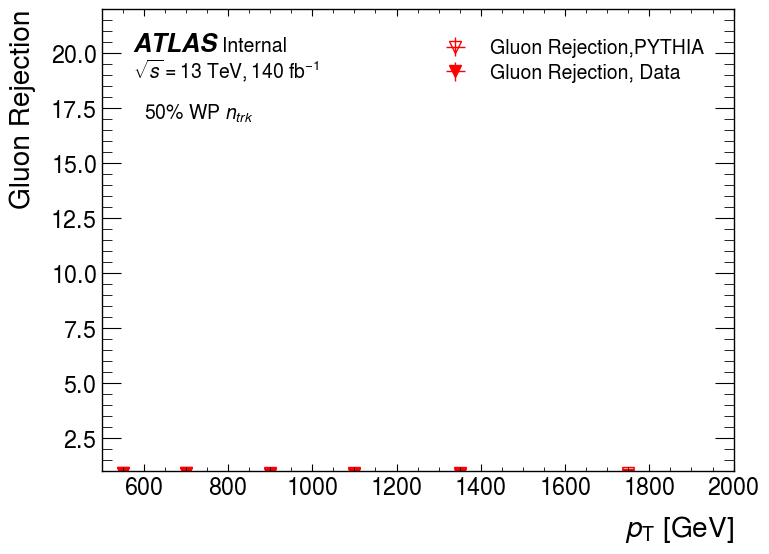

mc:  [0.840573659535602+/-0.0005225699358756263] data:  [0.8379056289397672+/-0.0008566149125913541]
mc:  [0.840573659535602+/-0.0005225699358756263, 0.8394381405367801+/-0.00043957884467854644] data:  [0.8379056289397672+/-0.0008566149125913541, 0.8298235035187178+/-0.0009896793666524003]
mc:  [0.840573659535602+/-0.0005225699358756263, 0.8394381405367801+/-0.00043957884467854644, 0.8464697364423841+/-0.0005950423791500457] data:  [0.8379056289397672+/-0.0008566149125913541, 0.8298235035187178+/-0.0009896793666524003, 0.8283778345847954+/-0.002473764081143666]
mc:  [0.840573659535602+/-0.0005225699358756263, 0.8394381405367801+/-0.00043957884467854644, 0.8464697364423841+/-0.0005950423791500457, 0.8452212506425206+/-0.0009238488729619688] data:  [0.8379056289397672+/-0.0008566149125913541, 0.8298235035187178+/-0.0009896793666524003, 0.8283778345847954+/-0.002473764081143666, 0.8126845088050965+/-0.00594679370696174]
mc:  [0.840573659535602+/-0.0005225699358756263, 0.8394381405367801+/

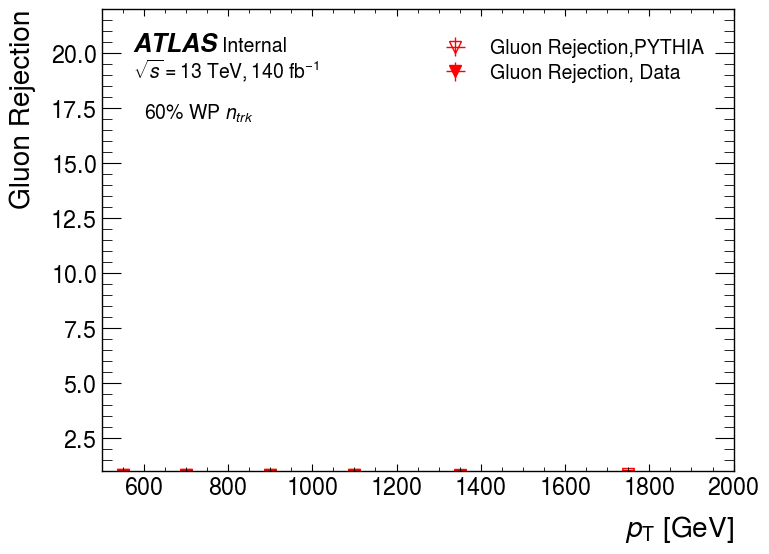

mc:  [0.7485410028956239+/-0.00048415200077382665] data:  [0.7457931054917564+/-0.000791118373848279]
mc:  [0.7485410028956239+/-0.00048415200077382665, 0.7541702931355265+/-0.0004080022485089792] data:  [0.7457931054917564+/-0.000791118373848279, 0.7423287909163807+/-0.000914586144202368]
mc:  [0.7485410028956239+/-0.00048415200077382665, 0.7541702931355265+/-0.0004080022485089792, 0.7710124249345+/-0.0005548458670182445] data:  [0.7457931054917564+/-0.000791118373848279, 0.7423287909163807+/-0.000914586144202368, 0.7493807787502531+/-0.0022934927723185115]
mc:  [0.7485410028956239+/-0.00048415200077382665, 0.7541702931355265+/-0.0004080022485089792, 0.7710124249345+/-0.0005548458670182445, 0.7752999455537867+/-0.0008637611571992044] data:  [0.7457931054917564+/-0.000791118373848279, 0.7423287909163807+/-0.000914586144202368, 0.7493807787502531+/-0.0022934927723185115, 0.7418615797407893+/-0.00551738824632437]
mc:  [0.7485410028956239+/-0.00048415200077382665, 0.7541702931355265+/-0.0

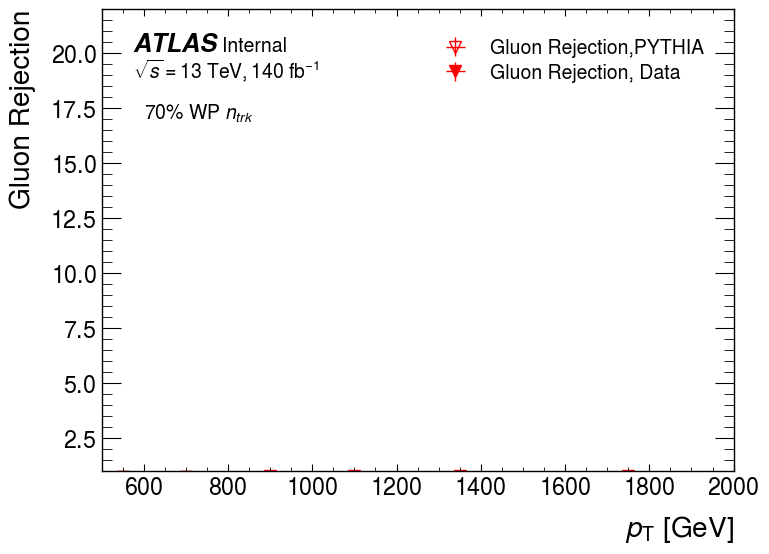

mc:  [0.6437792031456422+/-0.0004425873903151659] data:  [0.6402897826268567+/-0.0007210267748311226]
mc:  [0.6437792031456422+/-0.0004425873903151659, 0.6076572963208156+/-0.0003574771938746587] data:  [0.6402897826268567+/-0.0007210267748311226, 0.5931883189784057+/-0.0007963577284085363]
mc:  [0.6437792031456422+/-0.0004425873903151659, 0.6076572963208156+/-0.0003574771938746587, 0.6415853205204446+/-0.0004922825208882862] data:  [0.6402897826268567+/-0.0007210267748311226, 0.5931883189784057+/-0.0007963577284085363, 0.6178788384450723+/-0.0020174089787982404]
mc:  [0.6437792031456422+/-0.0004425873903151659, 0.6076572963208156+/-0.0003574771938746587, 0.6415853205204446+/-0.0004922825208882862, 0.6149703162369674+/-0.000741041777701727] data:  [0.6402897826268567+/-0.0007210267748311226, 0.5931883189784057+/-0.0007963577284085363, 0.6178788384450723+/-0.0020174089787982404, 0.5790817565228413+/-0.004663078497841187]
mc:  [0.6437792031456422+/-0.0004425873903151659, 0.60765729632081

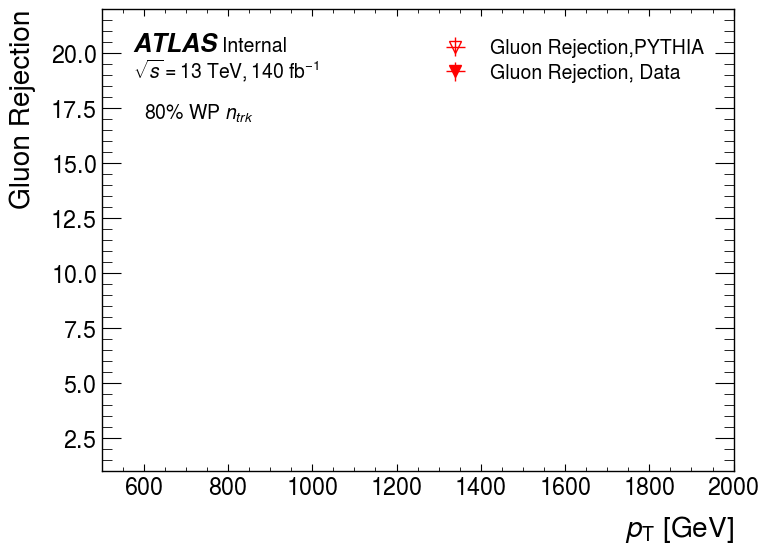

mc:  [0.9172788580101091+/-0.0005787412726521296] data:  [0.9125601236728524+/-0.0008682437537066141]
mc:  [0.9172788580101091+/-0.0005787412726521296, 0.9367314345883913+/-0.0005177884845854507] data:  [0.9125601236728524+/-0.0008682437537066141, 0.9331958950769492+/-0.0010490854065477947]
mc:  [0.9172788580101091+/-0.0005787412726521296, 0.9367314345883913+/-0.0005177884845854507, 0.9352913425710148+/-0.000803888691720585] data:  [0.9125601236728524+/-0.0008682437537066141, 0.9331958950769492+/-0.0010490854065477947, 0.9357686422860835+/-0.0026863821447694024]
mc:  [0.9172788580101091+/-0.0005787412726521296, 0.9367314345883913+/-0.0005177884845854507, 0.9352913425710148+/-0.000803888691720585, 0.9289731675387911+/-0.0012364749294511647] data:  [0.9125601236728524+/-0.0008682437537066141, 0.9331958950769492+/-0.0010490854065477947, 0.9357686422860835+/-0.0026863821447694024, 0.9240507499029448+/-0.006662480467122091]
mc:  [0.9172788580101091+/-0.0005787412726521296, 0.936731434588391

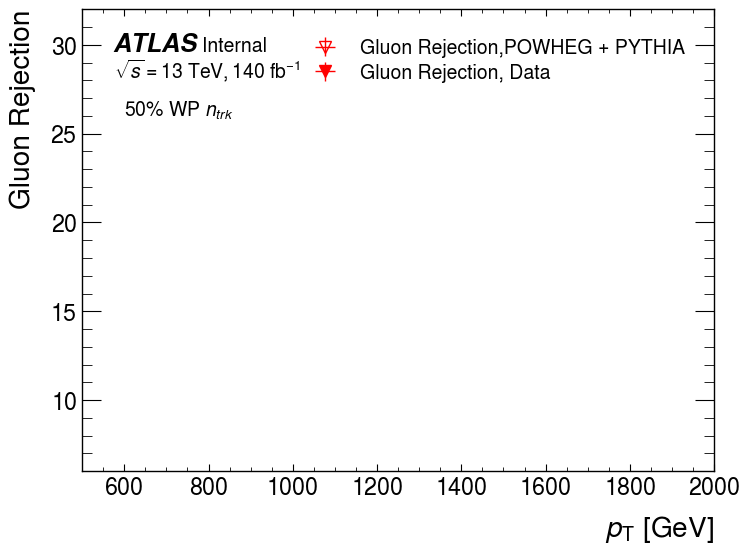

mc:  [0.8859930824236504+/-0.0005607037427485203] data:  [0.8800472088883463+/-0.0008413184237974528]
mc:  [0.8859930824236504+/-0.0005607037427485203, 0.8810549789021874+/-0.0004864245481378862] data:  [0.8800472088883463+/-0.0008413184237974528, 0.8744174261251416+/-0.000985007373137769]
mc:  [0.8859930824236504+/-0.0005607037427485203, 0.8810549789021874+/-0.0004864245481378862, 0.8839195246502949+/-0.0007562817788091661] data:  [0.8800472088883463+/-0.0008413184237974528, 0.8744174261251416+/-0.000985007373137769, 0.8818984070612302+/-0.0025219626170611604]
mc:  [0.8859930824236504+/-0.0005607037427485203, 0.8810549789021874+/-0.0004864245481378862, 0.8839195246502949+/-0.0007562817788091661, 0.8782615118167592+/-0.0011636427978452917] data:  [0.8800472088883463+/-0.0008413184237974528, 0.8744174261251416+/-0.000985007373137769, 0.8818984070612302+/-0.0025219626170611604, 0.8678296434472548+/-0.006245055744542856]
mc:  [0.8859930824236504+/-0.0005607037427485203, 0.8810549789021874

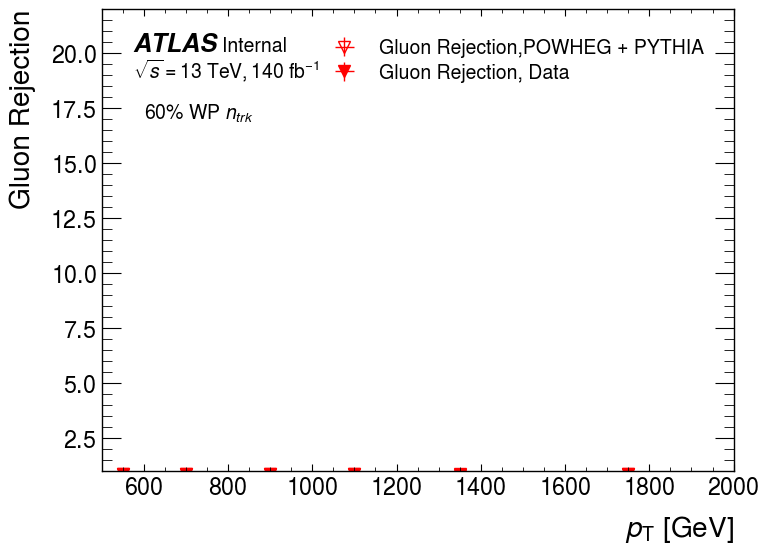

mc:  [0.8053909456931234+/-0.0005219647286505999] data:  [0.7973856810057165+/-0.0007824446432985523]
mc:  [0.8053909456931234+/-0.0005219647286505999, 0.8048644207018365+/-0.0004526181520437532] data:  [0.7973856810057165+/-0.0007824446432985523, 0.7958718978181456+/-0.0009156025294360338]
mc:  [0.8053909456931234+/-0.0005219647286505999, 0.8048644207018365+/-0.0004526181520437532, 0.815446682949567+/-0.0007058359900445943] data:  [0.7973856810057165+/-0.0007824446432985523, 0.7958718978181456+/-0.0009156025294360338, 0.8120725510614585+/-0.0023491888460832454]
mc:  [0.8053909456931234+/-0.0005219647286505999, 0.8048644207018365+/-0.0004526181520437532, 0.815446682949567+/-0.0007058359900445943, 0.8136626267736443+/-0.001089479509283595] data:  [0.7973856810057165+/-0.0007824446432985523, 0.7958718978181456+/-0.0009156025294360338, 0.8120725510614585+/-0.0023491888460832454, 0.8010116117723699+/-0.005815109887462289]
mc:  [0.8053909456931234+/-0.0005219647286505999, 0.8048644207018365

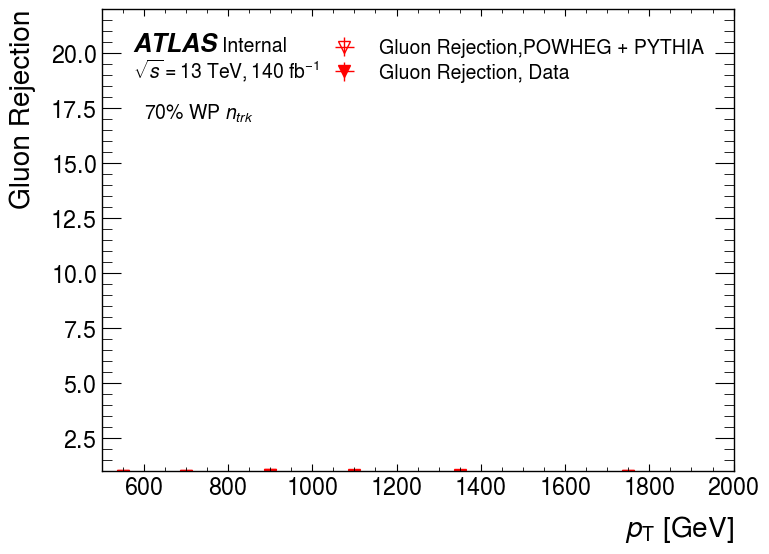

mc:  [0.6539974559177586+/-0.00045837397445624663] data:  [0.6451099898064223+/-0.000685218266795096]
mc:  [0.6539974559177586+/-0.00045837397445624663, 0.6652739469957648+/-0.00039925552711260346] data:  [0.6451099898064223+/-0.000685218266795096, 0.6530623411286793+/-0.0008047485726562489]
mc:  [0.6539974559177586+/-0.00045837397445624663, 0.6652739469957648+/-0.00039925552711260346, 0.6913000662954453+/-0.0006273602301451275] data:  [0.6451099898064223+/-0.000685218266795096, 0.6530623411286793+/-0.0008047485726562489, 0.6836556053880388+/-0.0020806107886733234]
mc:  [0.6539974559177586+/-0.00045837397445624663, 0.6652739469957648+/-0.00039925552711260346, 0.6913000662954453+/-0.0006273602301451275, 0.6985353286433029+/-0.000981202310835387] data:  [0.6451099898064223+/-0.000685218266795096, 0.6530623411286793+/-0.0008047485726562489, 0.6836556053880388+/-0.0020806107886733234, 0.6844602634958067+/-0.005164040911024633]
mc:  [0.6539974559177586+/-0.00045837397445624663, 0.6652739469

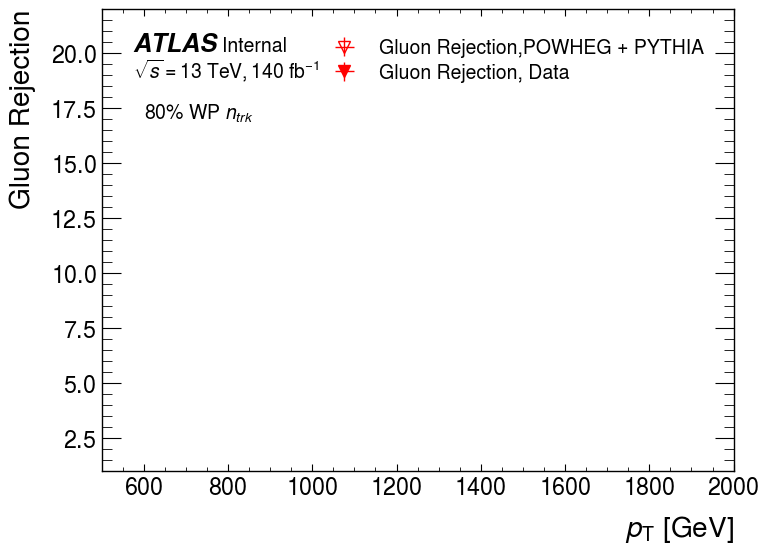

mc:  [0.8712700830130313+/-0.007693482898440362] data:  [0.8719049022305039+/-0.0009126990544265703]
mc:  [0.8712700830130313+/-0.007693482898440362, 0.8690642470396744+/-0.006251872679823131] data:  [0.8719049022305039+/-0.0009126990544265703, 0.8565834539733108+/-0.0009993997522701817]
mc:  [0.8712700830130313+/-0.007693482898440362, 0.8690642470396744+/-0.006251872679823131, 0.8733764506171589+/-0.006382638192913654] data:  [0.8719049022305039+/-0.0009126990544265703, 0.8565834539733108+/-0.0009993997522701817, 0.8658111364442451+/-0.0025520858316793573]
mc:  [0.8712700830130313+/-0.007693482898440362, 0.8690642470396744+/-0.006251872679823131, 0.8733764506171589+/-0.006382638192913654, 0.8706033270248225+/-0.008377088499328387] data:  [0.8719049022305039+/-0.0009126990544265703, 0.8565834539733108+/-0.0009993997522701817, 0.8658111364442451+/-0.0025520858316793573, 0.8515472120328861+/-0.006322260363366388]
mc:  [0.8712700830130313+/-0.007693482898440362, 0.8690642470396744+/-0.006

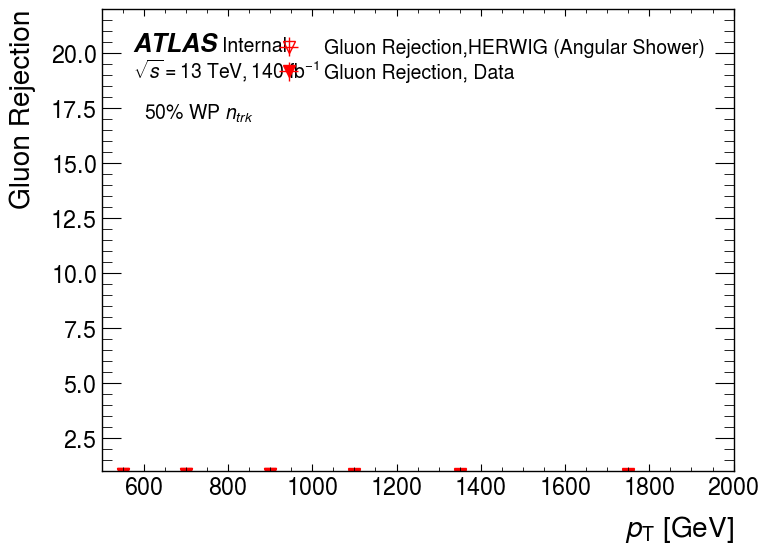

mc:  [0.7912284186110444+/-0.0071713191467168615] data:  [0.7958308667836038+/-0.0008488355264543612]
mc:  [0.7912284186110444+/-0.0071713191467168615, 0.7945554619183751+/-0.005830710660338972] data:  [0.7958308667836038+/-0.0008488355264543612, 0.7813921985574683+/-0.0009292871619344477]
mc:  [0.7912284186110444+/-0.0071713191467168615, 0.7945554619183751+/-0.005830710660338972, 0.8033748483527061+/-0.00595418498143428] data:  [0.7958308667836038+/-0.0008488355264543612, 0.7813921985574683+/-0.0009292871619344477, 0.7943657494730221+/-0.0023740386459346692]
mc:  [0.7912284186110444+/-0.0071713191467168615, 0.7945554619183751+/-0.005830710660338972, 0.8033748483527061+/-0.00595418498143428, 0.8049971294806489+/-0.007810474573296329] data:  [0.7958308667836038+/-0.0008488355264543612, 0.7813921985574683+/-0.0009292871619344477, 0.7943657494730221+/-0.0023740386459346692, 0.7846438436760023+/-0.005882422621584788]
mc:  [0.7912284186110444+/-0.0071713191467168615, 0.7945554619183751+/-0.

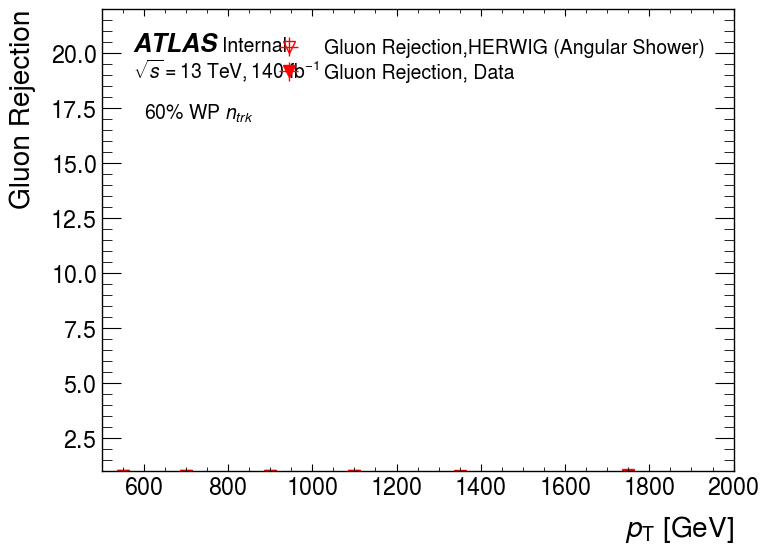

mc:  [0.6972423076439362+/-0.0065901335833925285] data:  [0.6973281313103228+/-0.0007785088913961789]
mc:  [0.6972423076439362+/-0.0065901335833925285, 0.7042972565087479+/-0.0053854633621190605] data:  [0.6973281313103228+/-0.0007785088913961789, 0.6923734411151115+/-0.0008556776827659857]
mc:  [0.6972423076439362+/-0.0065901335833925285, 0.7042972565087479+/-0.0053854633621190605, 0.7244461581059218+/-0.005510442751104234] data:  [0.6973281313103228+/-0.0007785088913961789, 0.6923734411151115+/-0.0008556776827659857, 0.7145417627609978+/-0.0021935448722459248]
mc:  [0.6972423076439362+/-0.0065901335833925285, 0.7042972565087479+/-0.0053854633621190605, 0.7244461581059218+/-0.005510442751104234, 0.6851143276184669+/-0.006953792430356489] data:  [0.6973281313103228+/-0.0007785088913961789, 0.6923734411151115+/-0.0008556776827659857, 0.7145417627609978+/-0.0021935448722459248, 0.6646363706259911+/-0.0052115911103520944]
mc:  [0.6972423076439362+/-0.0065901335833925285, 0.704297256508747

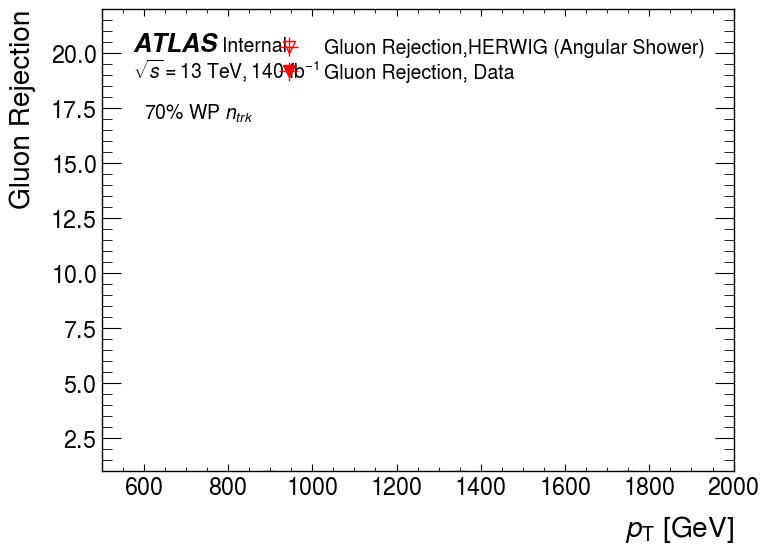

mc:  [0.5334415043003281+/-0.0056507134960084165] data:  [0.5333451010036052+/-0.0006665664430750807]
mc:  [0.5334415043003281+/-0.0056507134960084165, 0.5535953207212246+/-0.004668611259731442] data:  [0.5333451010036052+/-0.0006665664430750807, 0.5411796912337457+/-0.00073979748513687]
mc:  [0.5334415043003281+/-0.0056507134960084165, 0.5535953207212246+/-0.004668611259731442, 0.5478406789075919+/-0.004587714519649978] data:  [0.5333451010036052+/-0.0006665664430750807, 0.5411796912337457+/-0.00073979748513687, 0.5310722438386364+/-0.0018245024694520302]
mc:  [0.5334415043003281+/-0.0056507134960084165, 0.5535953207212246+/-0.004668611259731442, 0.5478406789075919+/-0.004587714519649978, 0.5583603977244832+/-0.006115814642374459] data:  [0.5333451010036052+/-0.0006665664430750807, 0.5411796912337457+/-0.00073979748513687, 0.5310722438386364+/-0.0018245024694520302, 0.5398480361793517+/-0.0045552739031404525]
mc:  [0.5334415043003281+/-0.0056507134960084165, 0.5535953207212246+/-0.004

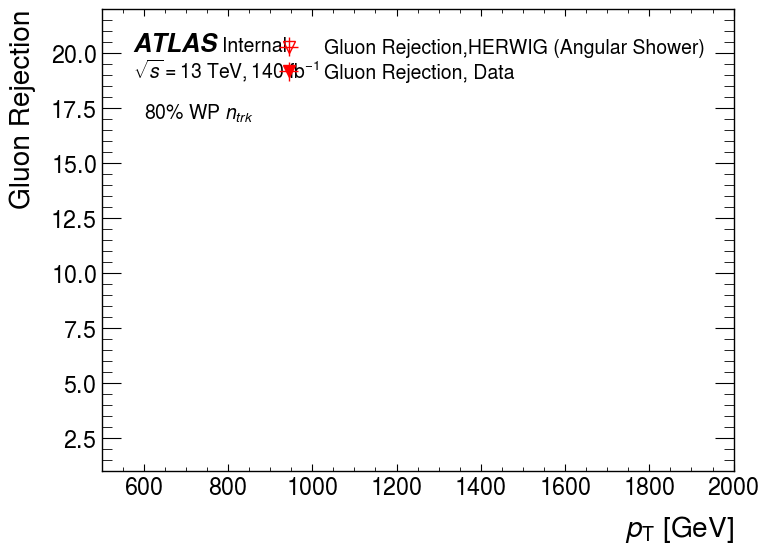

mc:  [0.7766703425273618+/-0.00443382132341093] data:  [0.8744284652207063+/-0.0008770273172666941]
mc:  [0.7766703425273618+/-0.00443382132341093, 0.7719415537643249+/-0.0037452790494244066] data:  [0.8744284652207063+/-0.0008770273172666941, 0.8651866672321308+/-0.0010056985863309328]
mc:  [0.7766703425273618+/-0.00443382132341093, 0.7719415537643249+/-0.0037452790494244066, 0.7719008561189924+/-0.00370345433613452] data:  [0.8744284652207063+/-0.0008770273172666941, 0.8651866672321308+/-0.0010056985863309328, 0.8745772747397726+/-0.002524218559912071]
mc:  [0.7766703425273618+/-0.00443382132341093, 0.7719415537643249+/-0.0037452790494244066, 0.7719008561189924+/-0.00370345433613452, 0.7587746483966215+/-0.004904391546501494] data:  [0.8744284652207063+/-0.0008770273172666941, 0.8651866672321308+/-0.0010056985863309328, 0.8745772747397726+/-0.002524218559912071, 0.8573271992611544+/-0.006104504211264065]
mc:  [0.7766703425273618+/-0.00443382132341093, 0.7719415537643249+/-0.003745279

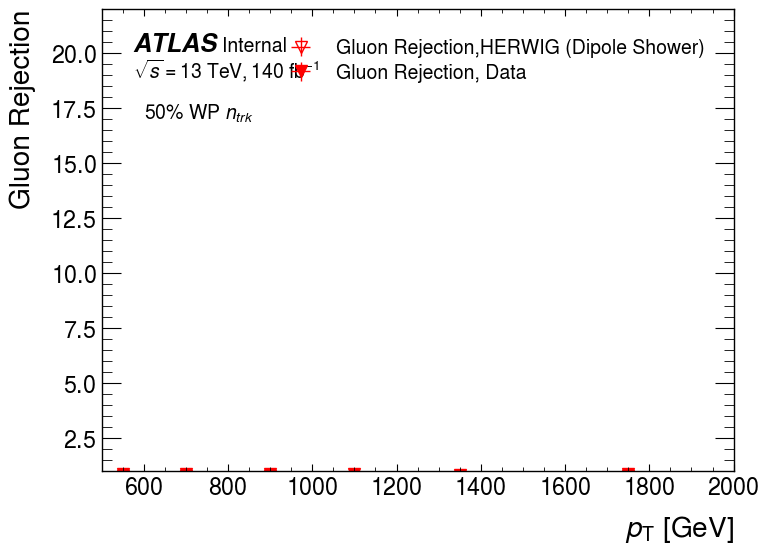

mc:  [0.6695736954322693+/-0.004039861002773415] data:  [0.7922923388036914+/-0.000814898623146823]
mc:  [0.6695736954322693+/-0.004039861002773415, 0.6738272470631649+/-0.0034257795895323937] data:  [0.7922923388036914+/-0.000814898623146823, 0.7920614363944022+/-0.0009355830566200303]
mc:  [0.6695736954322693+/-0.004039861002773415, 0.6738272470631649+/-0.0034257795895323937, 0.6793157928650128+/-0.003390500236266494] data:  [0.7922923388036914+/-0.000814898623146823, 0.7920614363944022+/-0.0009355830566200303, 0.807217085858446+/-0.0023521979473290016]
mc:  [0.6695736954322693+/-0.004039861002773415, 0.6738272470631649+/-0.0034257795895323937, 0.6793157928650128+/-0.003390500236266494, 0.6722415781681333+/-0.004495877871593108] data:  [0.7922923388036914+/-0.000814898623146823, 0.7920614363944022+/-0.0009355830566200303, 0.807217085858446+/-0.0023521979473290016, 0.7946213767362882+/-0.005689791978712778]
mc:  [0.6695736954322693+/-0.004039861002773415, 0.6738272470631649+/-0.003425

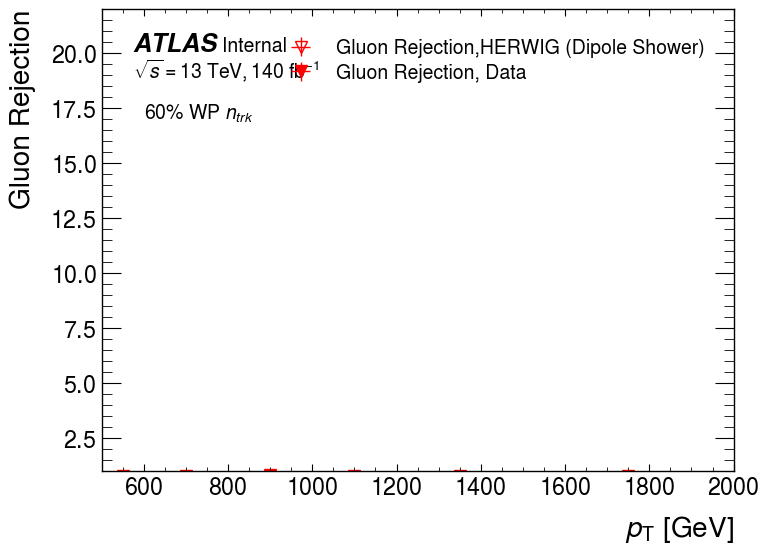

mc:  [0.5566312756967633+/-0.003624930687283318] data:  [0.6947872199431113+/-0.0007480102482571138]
mc:  [0.5566312756967633+/-0.003624930687283318, 0.5673806905704827+/-0.0030826415224590314] data:  [0.6947872199431113+/-0.0007480102482571138, 0.6994020385614942+/-0.000860282275161946]
mc:  [0.5566312756967633+/-0.003624930687283318, 0.5673806905704827+/-0.0030826415224590314, 0.5826748586898409+/-0.003073790652170611] data:  [0.6947872199431113+/-0.0007480102482571138, 0.6994020385614942+/-0.000860282275161946, 0.7276703161917468+/-0.002175581671117246]
mc:  [0.5566312756967633+/-0.003624930687283318, 0.5673806905704827+/-0.0030826415224590314, 0.5826748586898409+/-0.003073790652170611, 0.5814365684462429+/-0.004100059523166589] data:  [0.6947872199431113+/-0.0007480102482571138, 0.6994020385614942+/-0.000860282275161946, 0.7276703161917468+/-0.002175581671117246, 0.7232760546488064+/-0.005269907679675024]
mc:  [0.5566312756967633+/-0.003624930687283318, 0.5673806905704827+/-0.00308

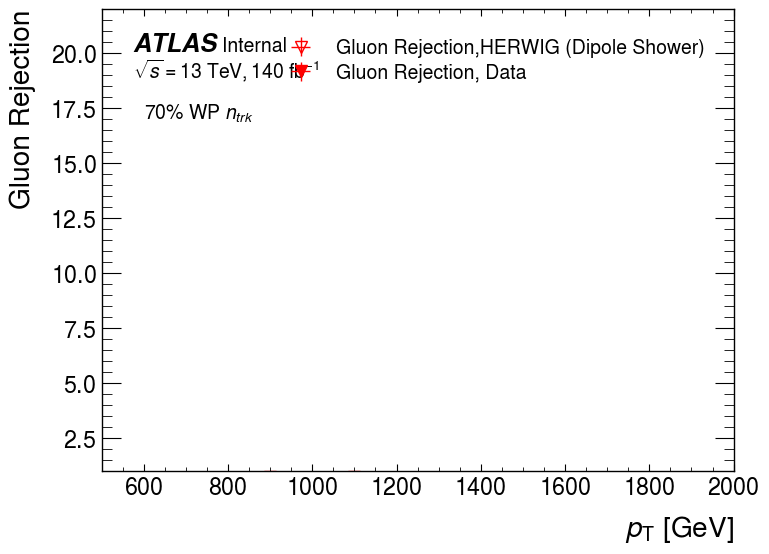

mc:  [0.3940510585251541+/-0.002992850760038751] data:  [0.532001096914895+/-0.0006410957499410819]
mc:  [0.3940510585251541+/-0.002992850760038751, 0.464502568816942+/-0.0027424682745963752] data:  [0.532001096914895+/-0.0006410957499410819, 0.6008060863239412+/-0.0007833354359304638]
mc:  [0.3940510585251541+/-0.002992850760038751, 0.464502568816942+/-0.0027424682745963752, 0.44660674528226907+/-0.0026128354143920285] data:  [0.532001096914895+/-0.0006410957499410819, 0.6008060863239412+/-0.0007833354359304638, 0.5959009255808159+/-0.001909203576367234]
mc:  [0.3940510585251541+/-0.002992850760038751, 0.464502568816942+/-0.0027424682745963752, 0.44660674528226907+/-0.0026128354143920285, 0.4091700230265376+/-0.0033256593212283884] data:  [0.532001096914895+/-0.0006410957499410819, 0.6008060863239412+/-0.0007833354359304638, 0.5959009255808159+/-0.001909203576367234, 0.5607612434251754+/-0.004438757269442282]
mc:  [0.3940510585251541+/-0.002992850760038751, 0.464502568816942+/-0.00274

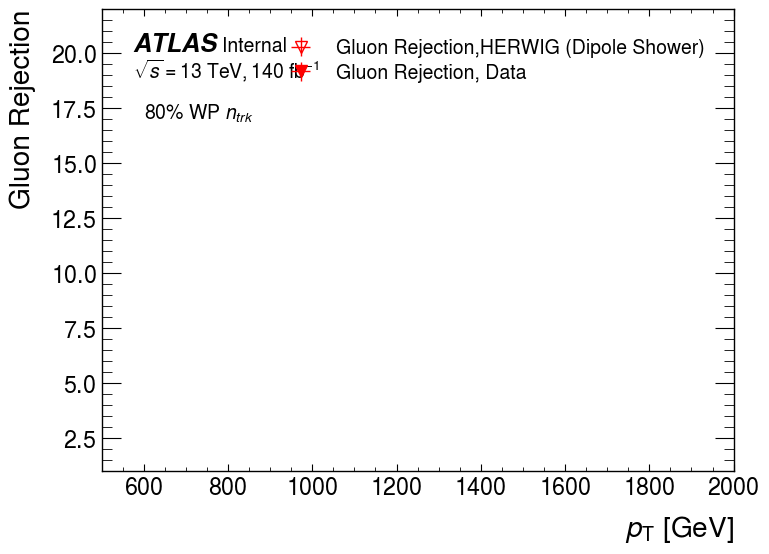

mc:  [0.8526959874339248+/-0.0021291379172459737] data:  [0.8735390298372306+/-0.0008596746336972874]
mc:  [0.8526959874339248+/-0.0021291379172459737, 0.8860235707283562+/-0.001273607449381692] data:  [0.8735390298372306+/-0.0008596746336972874, 0.8816454406136115+/-0.0010221182500035713]
mc:  [0.8526959874339248+/-0.0021291379172459737, 0.8860235707283562+/-0.001273607449381692, 0.8919122441970702+/-0.0018958460631019445] data:  [0.8735390298372306+/-0.0008596746336972874, 0.8816454406136115+/-0.0010221182500035713, 0.8801319453303323+/-0.0025733267545395276]
mc:  [0.8526959874339248+/-0.0021291379172459737, 0.8860235707283562+/-0.001273607449381692, 0.8919122441970702+/-0.0018958460631019445, 0.888955409933603+/-0.0044173109896070185] data:  [0.8735390298372306+/-0.0008596746336972874, 0.8816454406136115+/-0.0010221182500035713, 0.8801319453303323+/-0.0025733267545395276, 0.8665143115404162+/-0.006194602149499626]
mc:  [0.8526959874339248+/-0.0021291379172459737, 0.8860235707283562+

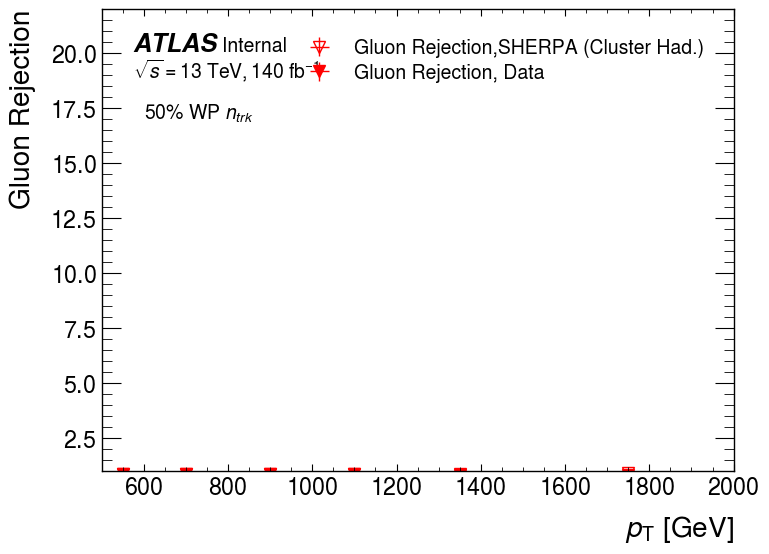

mc:  [0.8113047986941041+/-0.0020487461478948406] data:  [0.8347025569825931+/-0.0008300372701363233]
mc:  [0.8113047986941041+/-0.0020487461478948406, 0.8146492243722031+/-0.0011840332146143902] data:  [0.8347025569825931+/-0.0008300372701363233, 0.8105837415381414+/-0.000953101140567785]
mc:  [0.8113047986941041+/-0.0020487461478948406, 0.8146492243722031+/-0.0011840332146143902, 0.8291877338950112+/-0.001776635635047731] data:  [0.8347025569825931+/-0.0008300372701363233, 0.8105837415381414+/-0.000953101140567785, 0.8188442866373568+/-0.0024045482630689176]
mc:  [0.8113047986941041+/-0.0020487461478948406, 0.8146492243722031+/-0.0011840332146143902, 0.8291877338950112+/-0.001776635635047731, 0.8252453643287123+/-0.004125577059050568] data:  [0.8347025569825931+/-0.0008300372701363233, 0.8105837415381414+/-0.000953101140567785, 0.8188442866373568+/-0.0024045482630689176, 0.7995672467839786+/-0.005778134463476194]
mc:  [0.8113047986941041+/-0.0020487461478948406, 0.8146492243722031+/-

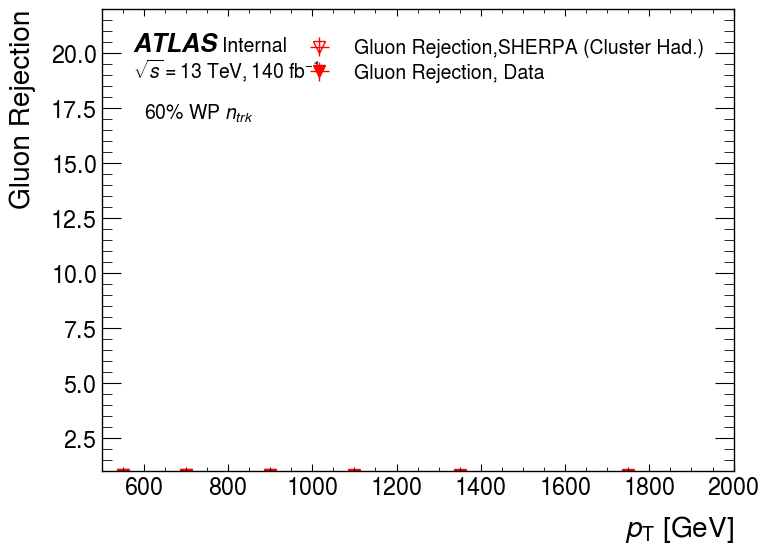

mc:  [0.7171045068285244+/-0.001878909306045358] data:  [0.7440081198897273+/-0.0007667666545994699]
mc:  [0.7171045068285244+/-0.001878909306045358, 0.727423902933388+/-0.0010890229254656959] data:  [0.7440081198897273+/-0.0007667666545994699, 0.723029268335539+/-0.0008796717158420206]
mc:  [0.7171045068285244+/-0.001878909306045358, 0.727423902933388+/-0.0010890229254656959, 0.7081147591149396+/-0.001585775304367443] data:  [0.7440081198897273+/-0.0007667666545994699, 0.723029268335539+/-0.0008796717158420206, 0.6990260931976331+/-0.0021383017731058424]
mc:  [0.7171045068285244+/-0.001878909306045358, 0.727423902933388+/-0.0010890229254656959, 0.7081147591149396+/-0.001585775304367443, 0.7157800606852256+/-0.0036872195379273245] data:  [0.7440081198897273+/-0.0007667666545994699, 0.723029268335539+/-0.0008796717158420206, 0.6990260931976331+/-0.0021383017731058424, 0.6917503520159302+/-0.005150233198944456]
mc:  [0.7171045068285244+/-0.001878909306045358, 0.727423902933388+/-0.001089

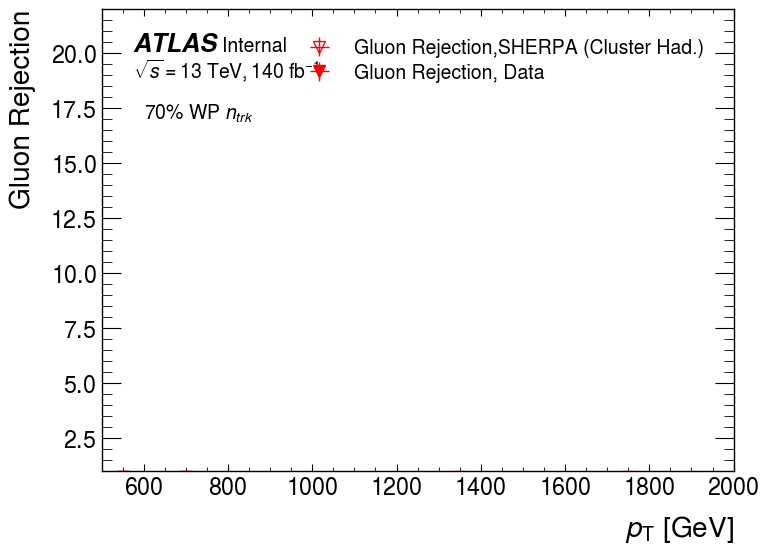

mc:  [0.5546448777654104+/-0.0016048360084169621] data:  [0.5859645090527563+/-0.0006644458146060338]
mc:  [0.5546448777654104+/-0.0016048360084169621, 0.5788876075090402+/-0.0009397340140875254] data:  [0.5859645090527563+/-0.0006644458146060338, 0.5751760166281447+/-0.0007643716197568328]
mc:  [0.5546448777654104+/-0.0016048360084169621, 0.5788876075090402+/-0.0009397340140875254, 0.5699637678979393+/-0.0013872765560892413] data:  [0.5859645090527563+/-0.0006644458146060338, 0.5751760166281447+/-0.0007643716197568328, 0.5621072102449385+/-0.0018666690718371834]
mc:  [0.5546448777654104+/-0.0016048360084169621, 0.5788876075090402+/-0.0009397340140875254, 0.5699637678979393+/-0.0013872765560892413, 0.5872655980209228+/-0.0032378326679625502] data:  [0.5859645090527563+/-0.0006644458146060338, 0.5751760166281447+/-0.0007643716197568328, 0.5621072102449385+/-0.0018666690718371834, 0.5685822762906748+/-0.004523627532878254]
mc:  [0.5546448777654104+/-0.0016048360084169621, 0.5788876075090

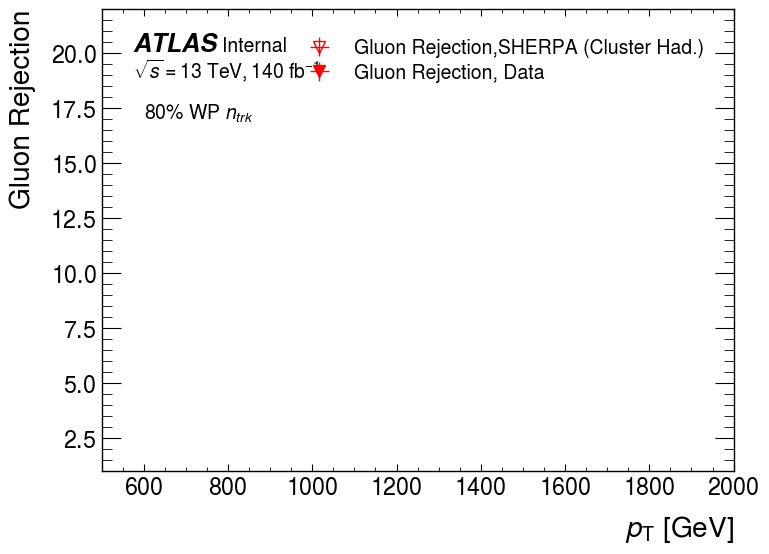

mc:  [0.8796144347912012+/-0.00341097411325965] data:  [0.8863063080983908+/-0.0008963003145866742]
mc:  [0.8796144347912012+/-0.00341097411325965, 0.882611482945772+/-0.0018323024714248116] data:  [0.8863063080983908+/-0.0008963003145866742, 0.8720111096523968+/-0.0010233015887601375]
mc:  [0.8796144347912012+/-0.00341097411325965, 0.882611482945772+/-0.0018323024714248116, 0.8861632034504814+/-0.0018790822815681128] data:  [0.8863063080983908+/-0.0008963003145866742, 0.8720111096523968+/-0.0010233015887601375, 0.8709003947460081+/-0.0025812668539344497]
mc:  [0.8796144347912012+/-0.00341097411325965, 0.882611482945772+/-0.0018323024714248116, 0.8861632034504814+/-0.0018790822815681128, 0.9096542118800449+/-0.004527842726945289] data:  [0.8863063080983908+/-0.0008963003145866742, 0.8720111096523968+/-0.0010233015887601375, 0.8709003947460081+/-0.0025812668539344497, 0.8791590275460728+/-0.006491118739930819]
mc:  [0.8796144347912012+/-0.00341097411325965, 0.882611482945772+/-0.0018323

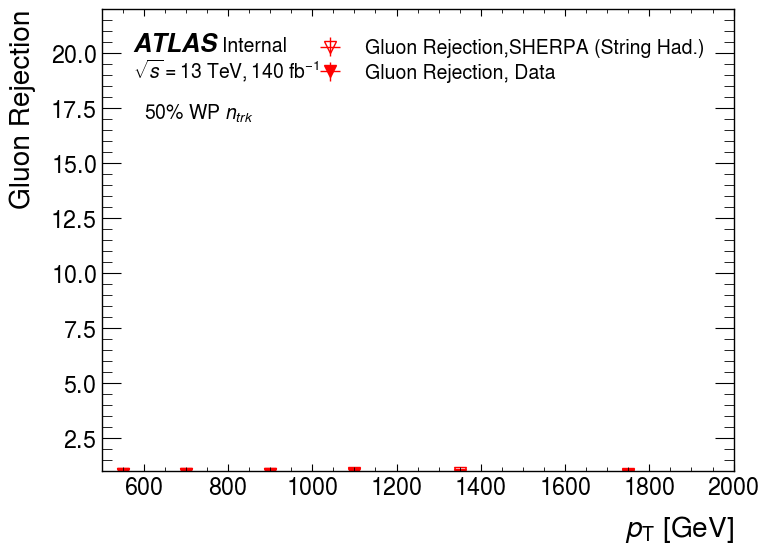

mc:  [0.7998682035406599+/-0.003163381487966167] data:  [0.8141712819803534+/-0.000837131729153532]
mc:  [0.7998682035406599+/-0.003163381487966167, 0.8102443784512697+/-0.0016983424862070365] data:  [0.8141712819803534+/-0.000837131729153532, 0.8016467494662654+/-0.0009539457368700622]
mc:  [0.7998682035406599+/-0.003163381487966167, 0.8102443784512697+/-0.0016983424862070365, 0.8208708912626062+/-0.0017574974456229418] data:  [0.8141712819803534+/-0.000837131729153532, 0.8016467494662654+/-0.0009539457368700622, 0.8073829878474994+/-0.002409550669895667]
mc:  [0.7998682035406599+/-0.003163381487966167, 0.8102443784512697+/-0.0016983424862070365, 0.8208708912626062+/-0.0017574974456229418, 0.8249324460026252+/-0.004100524628476958] data:  [0.8141712819803534+/-0.000837131729153532, 0.8016467494662654+/-0.0009539457368700622, 0.8073829878474994+/-0.002409550669895667, 0.7948328481147791+/-0.005872243694575539]
mc:  [0.7998682035406599+/-0.003163381487966167, 0.8102443784512697+/-0.0016

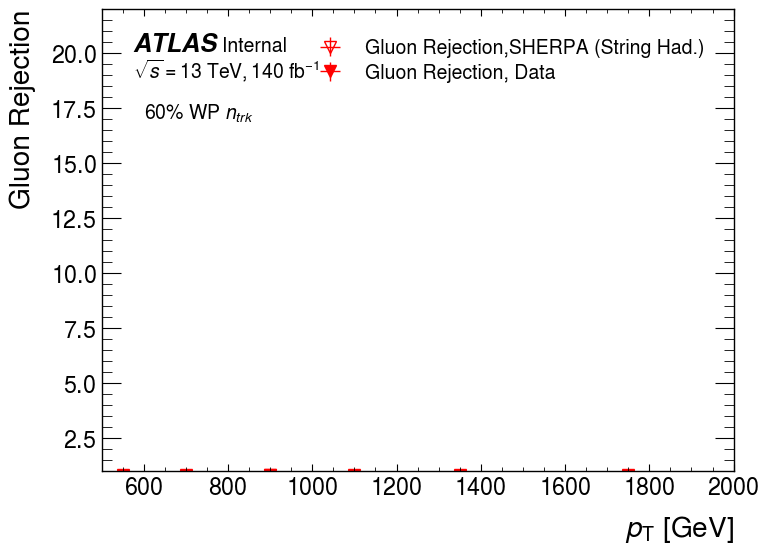

mc:  [0.7028966598060692+/-0.00289108256811112] data:  [0.7219542623515974+/-0.0007717954784357843]
mc:  [0.7028966598060692+/-0.00289108256811112, 0.7215788024109935+/-0.0015569552802172028] data:  [0.7219542623515974+/-0.0007717954784357843, 0.7164486895815829+/-0.0008806840153790245]
mc:  [0.7028966598060692+/-0.00289108256811112, 0.7215788024109935+/-0.0015569552802172028, 0.7419275954969123+/-0.001630219051266298] data:  [0.7219542623515974+/-0.0007717954784357843, 0.7164486895815829+/-0.0008806840153790245, 0.7301740186165278+/-0.0022319890700068863]
mc:  [0.7028966598060692+/-0.00289108256811112, 0.7215788024109935+/-0.0015569552802172028, 0.7419275954969123+/-0.001630219051266298, 0.7509351088918935+/-0.003802725868076614] data:  [0.7219542623515974+/-0.0007717954784357843, 0.7164486895815829+/-0.0008806840153790245, 0.7301740186165278+/-0.0022319890700068863, 0.7244684023001491+/-0.005443874726783814]
mc:  [0.7028966598060692+/-0.00289108256811112, 0.7215788024109935+/-0.00155

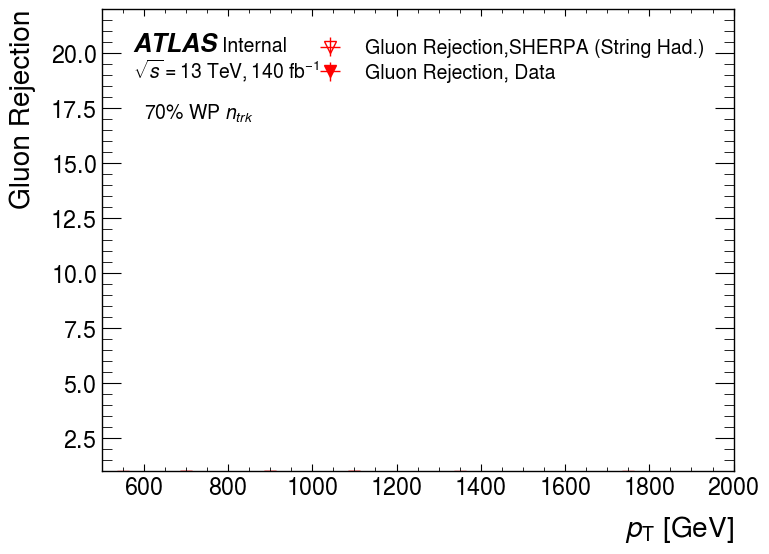

mc:  [0.5964202213950033+/-0.002608264726323677] data:  [0.6205298565890003+/-0.0007032073445801957]
mc:  [0.5964202213950033+/-0.002608264726323677, 0.5719062079306082+/-0.0013356294303301373] data:  [0.6205298565890003+/-0.0007032073445801957, 0.5684304419854085+/-0.000764509032692902]
mc:  [0.5964202213950033+/-0.002608264726323677, 0.5719062079306082+/-0.0013356294303301373, 0.6068889002595432+/-0.0014324346580575856] data:  [0.6205298565890003+/-0.0007032073445801957, 0.5684304419854085+/-0.000764509032692902, 0.5997276012479227+/-0.001959801589743708]
mc:  [0.5964202213950033+/-0.002608264726323677, 0.5719062079306082+/-0.0013356294303301373, 0.6068889002595432+/-0.0014324346580575856, 0.6278388079921126+/-0.003355218083133923] data:  [0.6205298565890003+/-0.0007032073445801957, 0.5684304419854085+/-0.000764509032692902, 0.5997276012479227+/-0.001959801589743708, 0.6049965019048819+/-0.004803368239081994]
mc:  [0.5964202213950033+/-0.002608264726323677, 0.5719062079306082+/-0.001

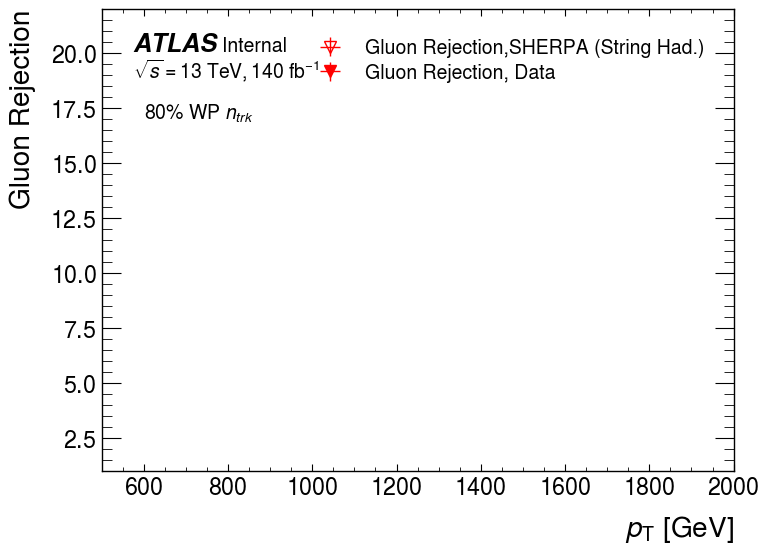

mc:  [0.9316000972456695+/-0.000559143384591016] data:  [0.92896893308169+/-0.0009180271039220995]
mc:  [0.9316000972456695+/-0.000559143384591016, 0.933490367335479+/-0.0004685299840573185] data:  [0.92896893308169+/-0.0009180271039220995, 0.9243719000723222+/-0.001055171371311523]
mc:  [0.9316000972456695+/-0.000559143384591016, 0.933490367335479+/-0.0004685299840573185, 0.9339221488073062+/-0.0006259294766553715] data:  [0.92896893308169+/-0.0009180271039220995, 0.9243719000723222+/-0.001055171371311523, 0.9161016860917751+/-0.002609204580308187]
mc:  [0.9316000972456695+/-0.000559143384591016, 0.933490367335479+/-0.0004685299840573185, 0.9339221488073062+/-0.0006259294766553715, 0.9351270090219305+/-0.000965872409286919] data:  [0.92896893308169+/-0.0009180271039220995, 0.9243719000723222+/-0.001055171371311523, 0.9161016860917751+/-0.002609204580308187, 0.9025512663161718+/-0.006264966420757628]
mc:  [0.9316000972456695+/-0.000559143384591016, 0.933490367335479+/-0.000468529984057

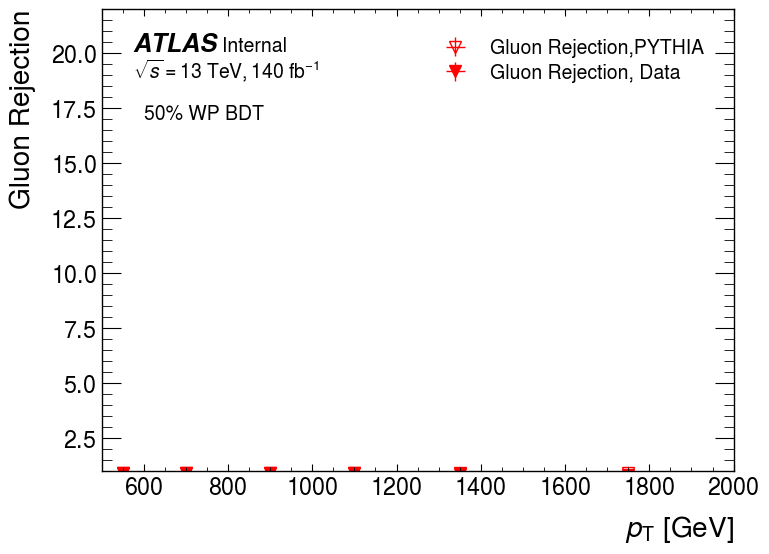

mc:  [0.8866214364307697+/-0.0005343565466665436] data:  [0.8792517343620422+/-0.0008725127812400954]
mc:  [0.8866214364307697+/-0.0005343565466665436, 0.8893770205921137+/-0.00044698041099895496] data:  [0.8792517343620422+/-0.0008725127812400954, 0.8741583926244431+/-0.0009994219750306466]
mc:  [0.8866214364307697+/-0.0005343565466665436, 0.8893770205921137+/-0.00044698041099895496, 0.8886760964273985+/-0.0005946356222620816] data:  [0.8792517343620422+/-0.0008725127812400954, 0.8741583926244431+/-0.0009994219750306466, 0.862991423584145+/-0.0024550903086262375]
mc:  [0.8866214364307697+/-0.0005343565466665436, 0.8893770205921137+/-0.00044698041099895496, 0.8886760964273985+/-0.0005946356222620816, 0.8907220730662342+/-0.0009144262575378682] data:  [0.8792517343620422+/-0.0008725127812400954, 0.8741583926244431+/-0.0009994219750306466, 0.862991423584145+/-0.0024550903086262375, 0.849545167360325+/-0.00586974272983314]
mc:  [0.8866214364307697+/-0.0005343565466665436, 0.88937702059211

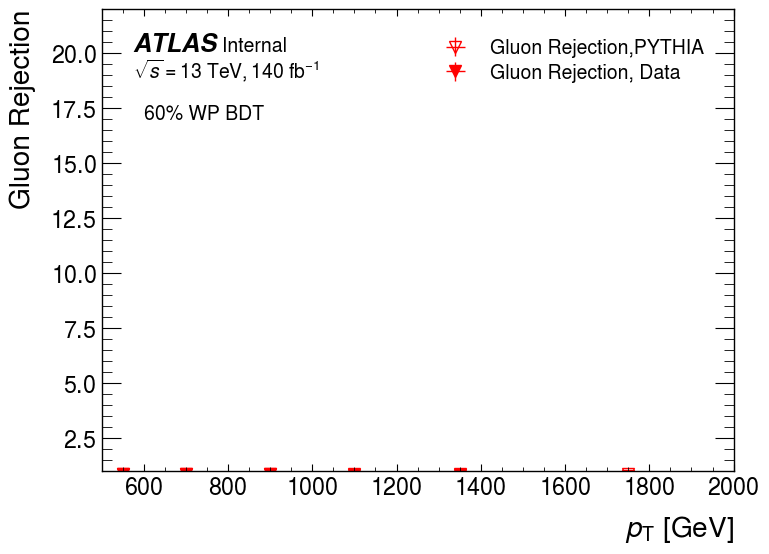

mc:  [0.8126920680826026+/-0.0004998856808623133] data:  [0.7956737909025423+/-0.0008086104282421755]
mc:  [0.8126920680826026+/-0.0004998856808623133, 0.8178472921990411+/-0.00041767908148335415] data:  [0.7956737909025423+/-0.0008086104282421755, 0.7912758358934935+/-0.0009228780174042393]
mc:  [0.8126920680826026+/-0.0004998856808623133, 0.8178472921990411+/-0.00041767908148335415, 0.8167966517108387+/-0.0005525825581469447] data:  [0.7956737909025423+/-0.0008086104282421755, 0.7912758358934935+/-0.0009228780174042393, 0.777698743158788+/-0.002249851806238989]
mc:  [0.8126920680826026+/-0.0004998856808623133, 0.8178472921990411+/-0.00041767908148335415, 0.8167966517108387+/-0.0005525825581469447, 0.8215122707593112+/-0.0008485883409618453] data:  [0.7956737909025423+/-0.0008086104282421755, 0.7912758358934935+/-0.0009228780174042393, 0.777698743158788+/-0.002249851806238989, 0.7680407104797494+/-0.00536448105956297]
mc:  [0.8126920680826026+/-0.0004998856808623133, 0.817847292199041

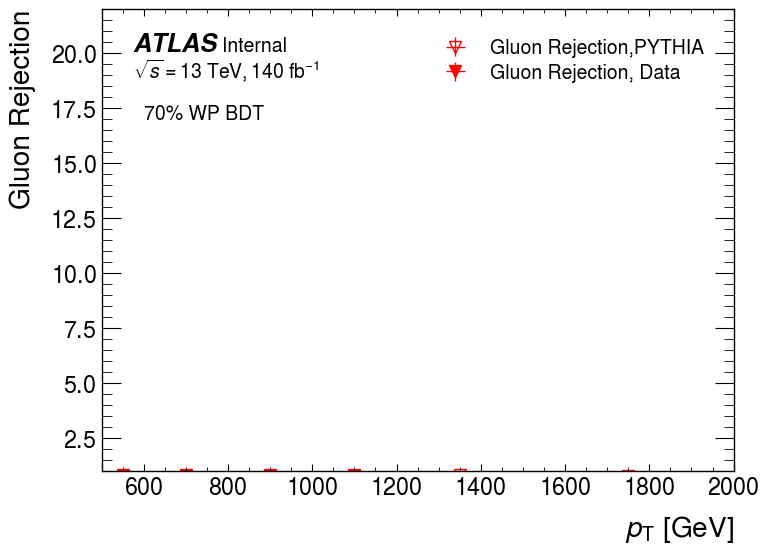

mc:  [0.7152885364002395+/-0.00045907015920363016] data:  [0.6864981242779099+/-0.0007342396242067988]
mc:  [0.7152885364002395+/-0.00045907015920363016, 0.7229975076530331+/-0.00038343644298548095] data:  [0.6864981242779099+/-0.0007342396242067988, 0.6841089075808793+/-0.0008354820175882604]
mc:  [0.7152885364002395+/-0.00045907015920363016, 0.7229975076530331+/-0.00038343644298548095, 0.7226621100393977+/-0.0005056191634329379] data:  [0.6864981242779099+/-0.0007342396242067988, 0.6841089075808793+/-0.0008354820175882604, 0.6707776123679987+/-0.002024378046826473]
mc:  [0.7152885364002395+/-0.00045907015920363016, 0.7229975076530331+/-0.00038343644298548095, 0.7226621100393977+/-0.0005056191634329379, 0.7004874101907317+/-0.0007519237943872321] data:  [0.6864981242779099+/-0.0007342396242067988, 0.6841089075808793+/-0.0008354820175882604, 0.6707776123679987+/-0.002024378046826473, 0.6298471823599497+/-0.004638412962516108]
mc:  [0.7152885364002395+/-0.00045907015920363016, 0.7229975

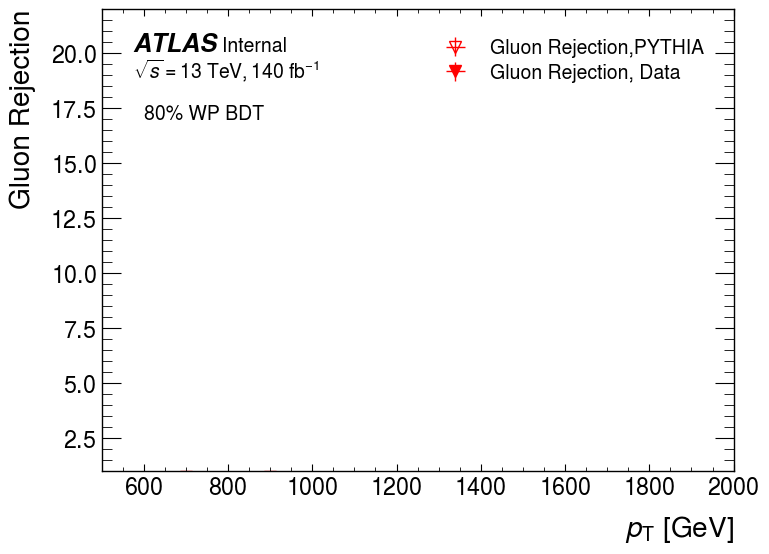

mc:  [0.9446813119851379+/-0.0005834465316749871] data:  [0.9391798905477178+/-0.0008740638118497366]
mc:  [0.9446813119851379+/-0.0005834465316749871, 0.9456739408424334+/-0.0005047043987963689] data:  [0.9391798905477178+/-0.0008740638118497366, 0.939061537798386+/-0.0010189502645964184]
mc:  [0.9446813119851379+/-0.0005834465316749871, 0.9456739408424334+/-0.0005047043987963689, 0.9453724470494599+/-0.0007793785953999599] data:  [0.9391798905477178+/-0.0008740638118497366, 0.939061537798386+/-0.0010189502645964184, 0.9414446906795406+/-0.0025816476156842513]
mc:  [0.9446813119851379+/-0.0005834465316749871, 0.9456739408424334+/-0.0005047043987963689, 0.9453724470494599+/-0.0007793785953999599, 0.9457584874512509+/-0.001187213131332821] data:  [0.9391798905477178+/-0.0008740638118497366, 0.939061537798386+/-0.0010189502645964184, 0.9414446906795406+/-0.0025816476156842513, 0.9346204052965171+/-0.006406651172214809]
mc:  [0.9446813119851379+/-0.0005834465316749871, 0.9456739408424334+

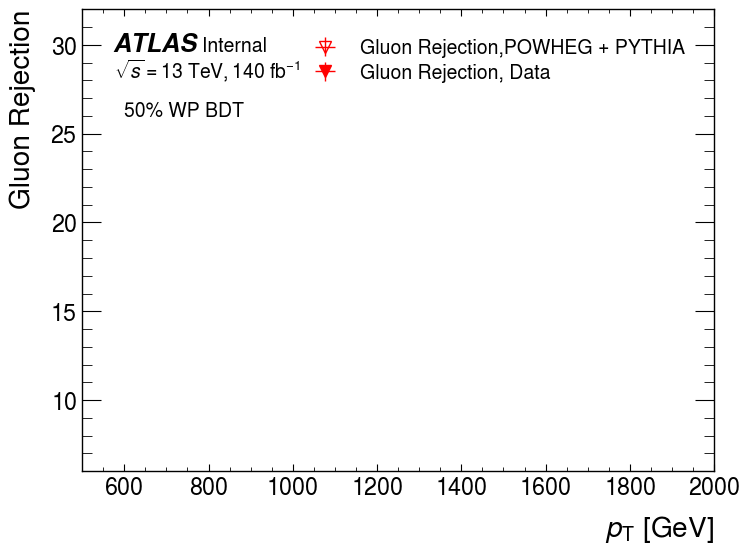

mc:  [0.9072752616733152+/-0.0005595554168561803] data:  [0.8963252398620289+/-0.0008351182691823673]
mc:  [0.9072752616733152+/-0.0005595554168561803, 0.9079603061331222+/-0.00048235200621282384] data:  [0.8963252398620289+/-0.0008351182691823673, 0.8957820502018073+/-0.0009694905956977578]
mc:  [0.9072752616733152+/-0.0005595554168561803, 0.9079603061331222+/-0.00048235200621282384, 0.9065239079663433+/-0.0007386985312183374] data:  [0.8963252398620289+/-0.0008351182691823673, 0.8957820502018073+/-0.0009694905956977578, 0.8970454408102373+/-0.0024406280805821983]
mc:  [0.9072752616733152+/-0.0005595554168561803, 0.9079603061331222+/-0.00048235200621282384, 0.9065239079663433+/-0.0007386985312183374, 0.9075759663069222+/-0.0011280612699499895] data:  [0.8963252398620289+/-0.0008351182691823673, 0.8957820502018073+/-0.0009694905956977578, 0.8970454408102373+/-0.0024406280805821983, 0.8886976111535999+/-0.00603241131234791]
mc:  [0.9072752616733152+/-0.0005595554168561803, 0.90796030613

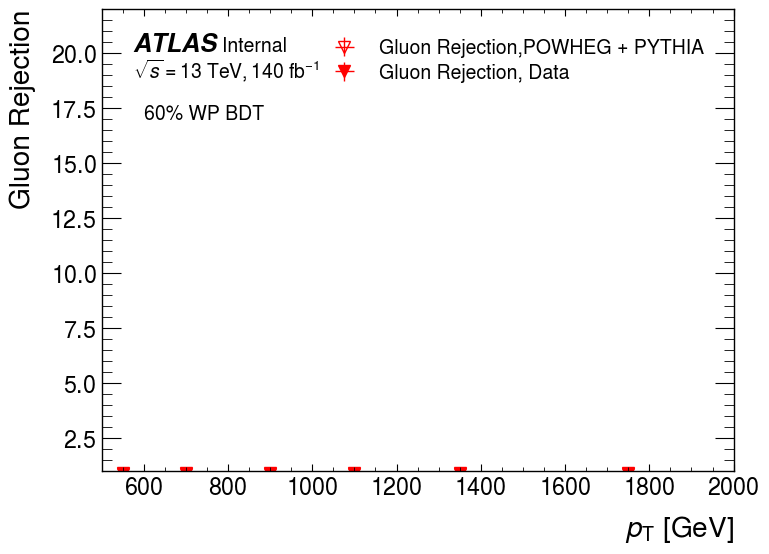

mc:  [0.846264384836695+/-0.0005270382829140468] data:  [0.8255967851816863+/-0.0007810338176913328]
mc:  [0.846264384836695+/-0.0005270382829140468, 0.8479507961282525+/-0.00045338155989635404] data:  [0.8255967851816863+/-0.0007810338176913328, 0.8247327329164008+/-0.000903103764966028]
mc:  [0.846264384836695+/-0.0005270382829140468, 0.8479507961282525+/-0.00045338155989635404, 0.8465351283724027+/-0.0006907034504583258] data:  [0.8255967851816863+/-0.0007810338176913328, 0.8247327329164008+/-0.000903103764966028, 0.8258067093310428+/-0.002260952285623751]
mc:  [0.846264384836695+/-0.0005270382829140468, 0.8479507961282525+/-0.00045338155989635404, 0.8465351283724027+/-0.0006907034504583258, 0.8468063327644307+/-0.0010328789615732176] data:  [0.8255967851816863+/-0.0007810338176913328, 0.8247327329164008+/-0.000903103764966028, 0.8258067093310428+/-0.002260952285623751, 0.8172772442612971+/-0.005551983163030428]
mc:  [0.846264384836695+/-0.0005270382829140468, 0.8479507961282525+/-0

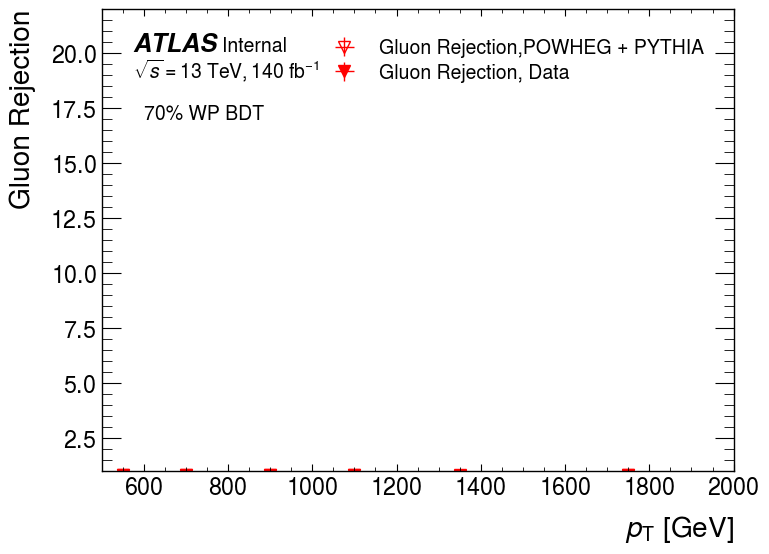

mc:  [0.7822354792267204+/-0.0004970608190383094] data:  [0.7521576753894261+/-0.0007310119267494965]
mc:  [0.7822354792267204+/-0.0004970608190383094, 0.7617870420925917+/-0.0004181234845073587] data:  [0.7521576753894261+/-0.0007310119267494965, 0.725881708315756+/-0.000822767403833438]
mc:  [0.7822354792267204+/-0.0004970608190383094, 0.7617870420925917+/-0.0004181234845073587, 0.7604293463884532+/-0.0006340362401424979] data:  [0.7521576753894261+/-0.0007310119267494965, 0.725881708315756+/-0.000822767403833438, 0.7247743114428182+/-0.0020448580597296827]
mc:  [0.7822354792267204+/-0.0004970608190383094, 0.7617870420925917+/-0.0004181234845073587, 0.7604293463884532+/-0.0006340362401424979, 0.7623845875302323+/-0.0009447105993865104] data:  [0.7521576753894261+/-0.0007310119267494965, 0.725881708315756+/-0.000822767403833438, 0.7247743114428182+/-0.0020448580597296827, 0.7178047315063628+/-0.004989615070786718]
mc:  [0.7822354792267204+/-0.0004970608190383094, 0.7617870420925917+/-

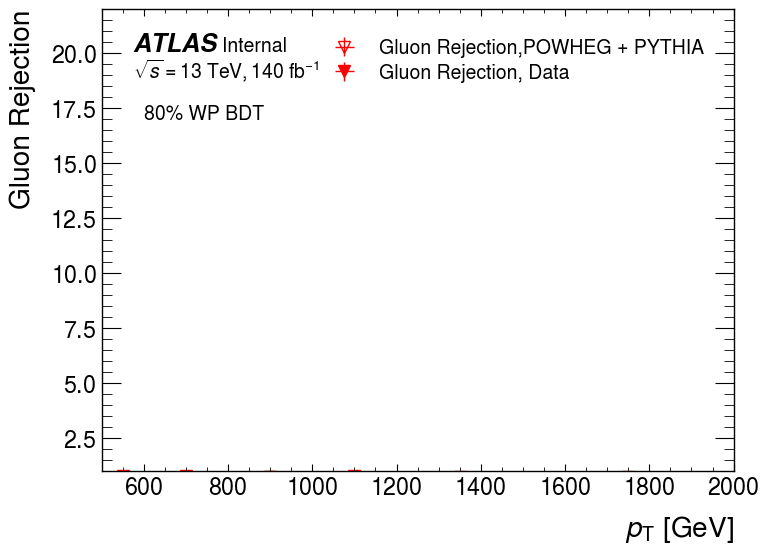

mc:  [0.8896944399170537+/-0.007831621211654906] data:  [0.8911543287980561+/-0.000925387941403755]
mc:  [0.8896944399170537+/-0.007831621211654906, 0.8897275649914117+/-0.006315852365363545] data:  [0.8911543287980561+/-0.000925387941403755, 0.8799520481905064+/-0.001002742206377439]
mc:  [0.8896944399170537+/-0.007831621211654906, 0.8897275649914117+/-0.006315852365363545, 0.9051011366457081+/-0.01106424484775867] data:  [0.8911543287980561+/-0.000925387941403755, 0.8799520481905064+/-0.001002742206377439, 0.8900165556945535+/-0.007766073155712017]
mc:  [0.8896944399170537+/-0.007831621211654906, 0.8897275649914117+/-0.006315852365363545, 0.9051011366457081+/-0.01106424484775867, 0.8941419668791672+/-0.0082823562498663] data:  [0.8911543287980561+/-0.000925387941403755, 0.8799520481905064+/-0.001002742206377439, 0.8900165556945535+/-0.007766073155712017, 0.8688125490831822+/-0.006239875344850183]
mc:  [0.8896944399170537+/-0.007831621211654906, 0.8897275649914117+/-0.0063158523653635

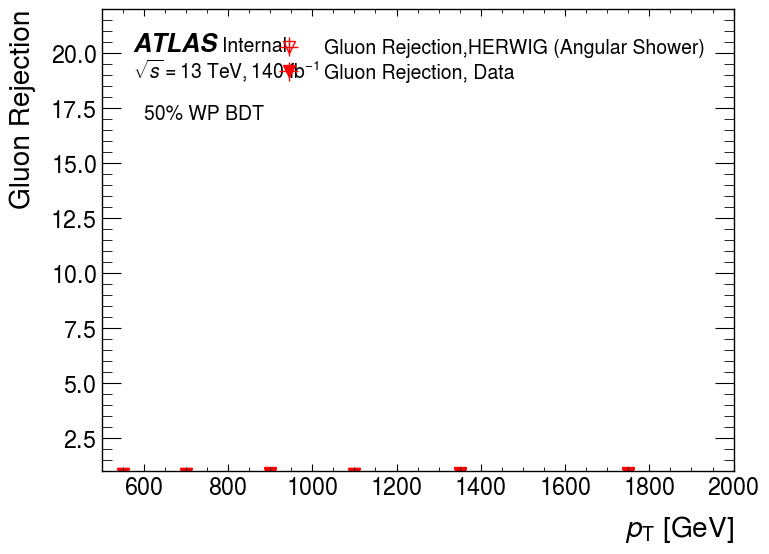

mc:  [0.8383110980932642+/-0.007473605029736256] data:  [0.8387764829326736+/-0.0008799401830503325]
mc:  [0.8383110980932642+/-0.007473605029736256, 0.8411922719249948+/-0.006025322765655176] data:  [0.8387764829326736+/-0.0008799401830503325, 0.8257080925908874+/-0.0009507281285298298]
mc:  [0.8383110980932642+/-0.007473605029736256, 0.8411922719249948+/-0.006025322765655176, 0.8411054801017686+/-0.010825358460751316] data:  [0.8387764829326736+/-0.0008799401830503325, 0.8257080925908874+/-0.0009507281285298298, 0.8276604614053109+/-0.007708131626017306]
mc:  [0.8383110980932642+/-0.007473605029736256, 0.8411922719249948+/-0.006025322765655176, 0.8411054801017686+/-0.010825358460751316, 0.8410594725050125+/-0.007817757961079537] data:  [0.8387764829326736+/-0.0008799401830503325, 0.8257080925908874+/-0.0009507281285298298, 0.8276604614053109+/-0.007708131626017306, 0.8157156408326655+/-0.005859732810785927]
mc:  [0.8383110980932642+/-0.007473605029736256, 0.8411922719249948+/-0.00602

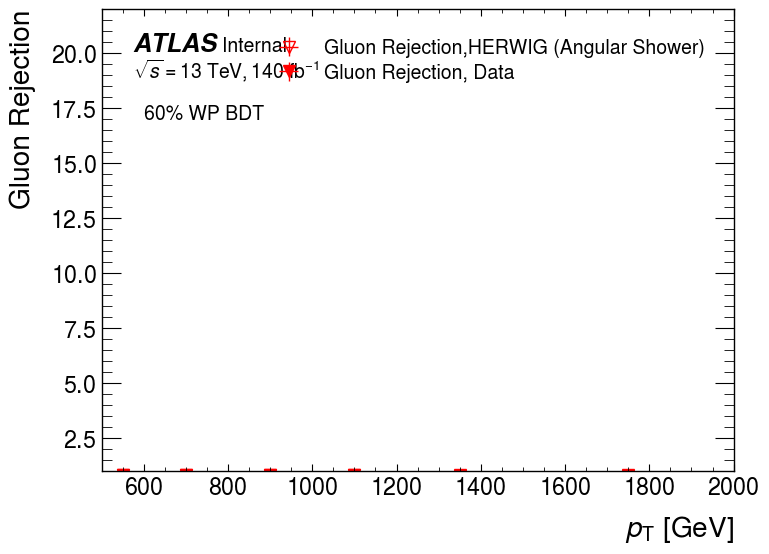

mc:  [0.7419988177167659+/-0.006860008193607907] data:  [0.7383275282260474+/-0.0008034202814383982]
mc:  [0.7419988177167659+/-0.006860008193607907, 0.750849544127964+/-0.005550067040091552] data:  [0.7383275282260474+/-0.0008034202814383982, 0.7358257343156701+/-0.0008691208716113359]
mc:  [0.7419988177167659+/-0.006860008193607907, 0.750849544127964+/-0.005550067040091552, 0.7455684674293124+/-0.010524959241028094] data:  [0.7383275282260474+/-0.0008034202814383982, 0.7358257343156701+/-0.0008691208716113359, 0.7290818586782781+/-0.007639015913061639]
mc:  [0.7419988177167659+/-0.006860008193607907, 0.750849544127964+/-0.005550067040091552, 0.7455684674293124+/-0.010524959241028094, 0.7514113383450286+/-0.007111549619237818] data:  [0.7383275282260474+/-0.0008034202814383982, 0.7358257343156701+/-0.0008691208716113359, 0.7290818586782781+/-0.007639015913061639, 0.726169684507999+/-0.0052937054701459145]
mc:  [0.7419988177167659+/-0.006860008193607907, 0.750849544127964+/-0.005550067

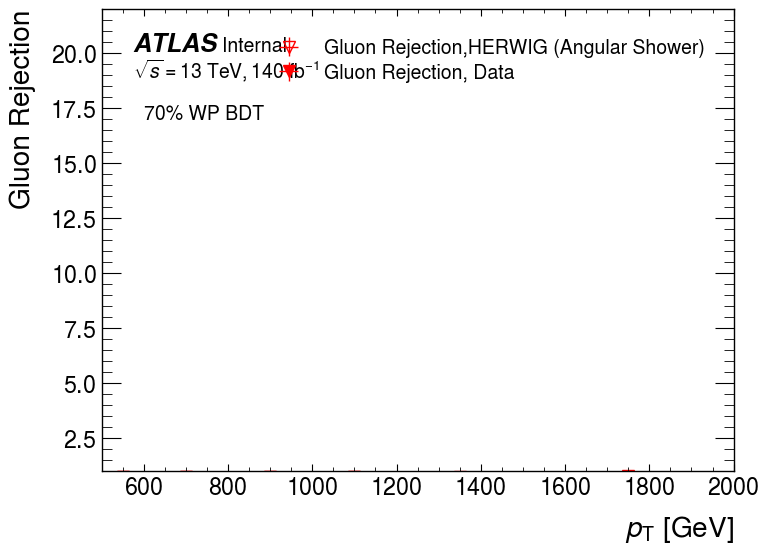

mc:  [0.6281064516359915+/-0.006197895725017672] data:  [0.6261088327527501+/-0.0007229714551518399]
mc:  [0.6281064516359915+/-0.006197895725017672, 0.6312095845279777+/-0.004985485202793006] data:  [0.6261088327527501+/-0.0007229714551518399, 0.617602325124923+/-0.0007769122346425045]
mc:  [0.6281064516359915+/-0.006197895725017672, 0.6312095845279777+/-0.004985485202793006, 0.6282692376083278+/-0.01022322233071355] data:  [0.6261088327527501+/-0.0007229714551518399, 0.617602325124923+/-0.0007769122346425045, 0.6100578685282899+/-0.007573051401475335]
mc:  [0.6281064516359915+/-0.006197895725017672, 0.6312095845279777+/-0.004985485202793006, 0.6282692376083278+/-0.01022322233071355, 0.5952038494242492+/-0.00607952125892572] data:  [0.6261088327527501+/-0.0007229714551518399, 0.617602325124923+/-0.0007769122346425045, 0.6100578685282899+/-0.007573051401475335, 0.5651739115217016+/-0.004484942527571751]
mc:  [0.6281064516359915+/-0.006197895725017672, 0.6312095845279777+/-0.00498548520

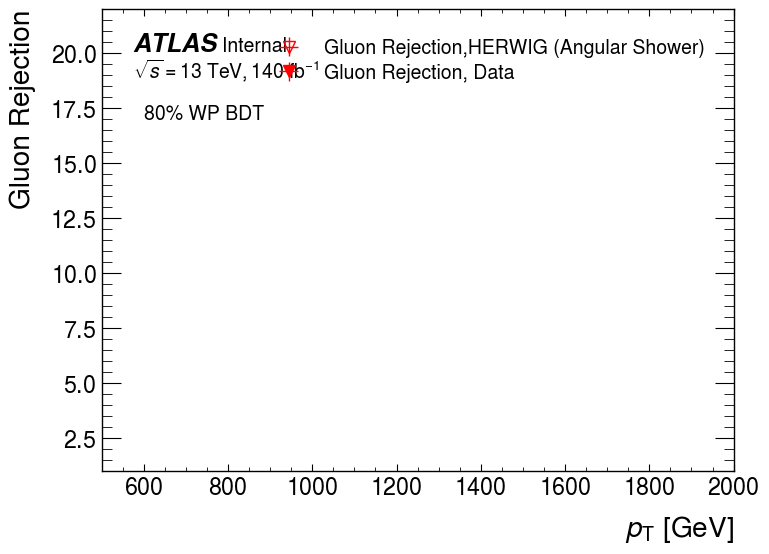

mc:  [0.8171350748506915+/-0.0045408592539828655] data:  [0.9011880909742991+/-0.0008917730569228398]
mc:  [0.8171350748506915+/-0.0045408592539828655, 0.8226844695957707+/-0.003858490028329039] data:  [0.9011880909742991+/-0.0008917730569228398, 0.8944106817194087+/-0.00102181497466088]
mc:  [0.8171350748506915+/-0.0045408592539828655, 0.8226844695957707+/-0.003858490028329039, 0.8208512299801396+/-0.003775822675683541] data:  [0.9011880909742991+/-0.0008917730569228398, 0.8944106817194087+/-0.00102181497466088, 0.900892811408344+/-0.002527768147133945]
mc:  [0.8171350748506915+/-0.0045408592539828655, 0.8226844695957707+/-0.003858490028329039, 0.8208512299801396+/-0.003775822675683541, 0.8027872438728195+/-0.004889647882129997] data:  [0.9011880909742991+/-0.0008917730569228398, 0.8944106817194087+/-0.00102181497466088, 0.900892811408344+/-0.002527768147133945, 0.8796861676802764+/-0.006045099156974369]
mc:  [0.8171350748506915+/-0.0045408592539828655, 0.8226844695957707+/-0.00385849

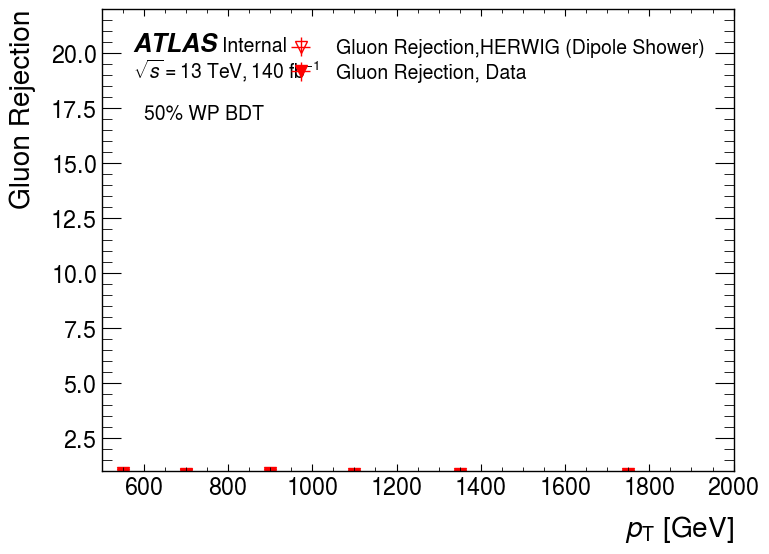

mc:  [0.7375856948981531+/-0.0042204774055051705] data:  [0.8346675486535513+/-0.0008371686745949804]
mc:  [0.7375856948981531+/-0.0042204774055051705, 0.7428019553716833+/-0.003582942001141944] data:  [0.8346675486535513+/-0.0008371686745949804, 0.8311117227889084+/-0.0009560418523137719]
mc:  [0.7375856948981531+/-0.0042204774055051705, 0.7428019553716833+/-0.003582942001141944, 0.7441318627607558+/-0.003492154402987838] data:  [0.8346675486535513+/-0.0008371686745949804, 0.8311117227889084+/-0.0009560418523137719, 0.8440048641801857+/-0.0023586996679323246]
mc:  [0.7375856948981531+/-0.0042204774055051705, 0.7428019553716833+/-0.003582942001141944, 0.7441318627607558+/-0.003492154402987838, 0.7351625991353979+/-0.00456546778042517] data:  [0.8346675486535513+/-0.0008371686745949804, 0.8311117227889084+/-0.0009560418523137719, 0.8440048641801857+/-0.0023586996679323246, 0.8229690159993455+/-0.005677463066471212]
mc:  [0.7375856948981531+/-0.0042204774055051705, 0.7428019553716833+/-0

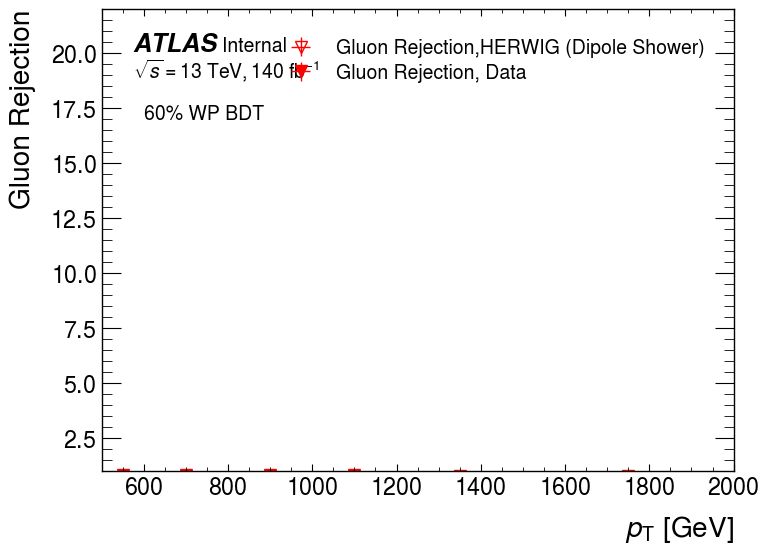

mc:  [0.6276753693847372+/-0.003803236809935538] data:  [0.7299992803870106+/-0.0007638745443301836]
mc:  [0.6276753693847372+/-0.003803236809935538, 0.6428755007555349+/-0.0032378104835833698] data:  [0.7299992803870106+/-0.0007638745443301836, 0.7363119019946238+/-0.0008727407670750449]
mc:  [0.6276753693847372+/-0.003803236809935538, 0.6428755007555349+/-0.0032378104835833698, 0.6405948702736961+/-0.003123061757085543] data:  [0.7299992803870106+/-0.0007638745443301836, 0.7363119019946238+/-0.0008727407670750449, 0.7439496080461505+/-0.00213575092879742]
mc:  [0.6276753693847372+/-0.003803236809935538, 0.6428755007555349+/-0.0032378104835833698, 0.6405948702736961+/-0.003123061757085543, 0.6384488405544454+/-0.004084063177904389] data:  [0.7299992803870106+/-0.0007638745443301836, 0.7363119019946238+/-0.0008727407670750449, 0.7439496080461505+/-0.00213575092879742, 0.733535508920092+/-0.005136101202976595]
mc:  [0.6276753693847372+/-0.003803236809935538, 0.6428755007555349+/-0.00323

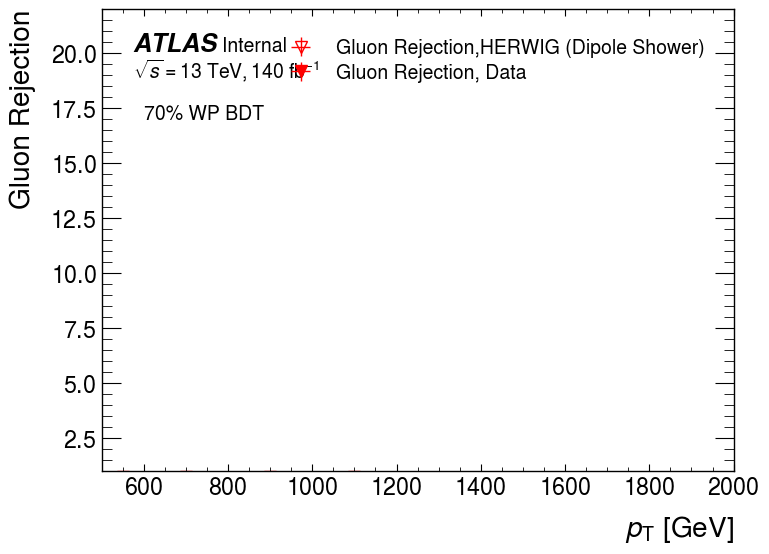

mc:  [0.5156839223502182+/-0.003374087368063493] data:  [0.6160104344989124+/-0.0006869777112290549]
mc:  [0.5156839223502182+/-0.003374087368063493, 0.5223390386851798+/-0.0028491576438125573] data:  [0.6160104344989124+/-0.0006869777112290549, 0.617100651114738+/-0.000779780481212588]
mc:  [0.5156839223502182+/-0.003374087368063493, 0.5223390386851798+/-0.0028491576438125573, 0.5232016419298124+/-0.0027373360388753647] data:  [0.6160104344989124+/-0.0006869777112290549, 0.617100651114738+/-0.000779780481212588, 0.6247828506688264+/-0.0019009994193972435]
mc:  [0.5156839223502182+/-0.003374087368063493, 0.5223390386851798+/-0.0028491576438125573, 0.5232016419298124+/-0.0027373360388753647, 0.5192601923014226+/-0.00352995412725585] data:  [0.6160104344989124+/-0.0006869777112290549, 0.617100651114738+/-0.000779780481212588, 0.6247828506688264+/-0.0019009994193972435, 0.6145170286607627+/-0.0045344067689423425]
mc:  [0.5156839223502182+/-0.003374087368063493, 0.5223390386851798+/-0.0028

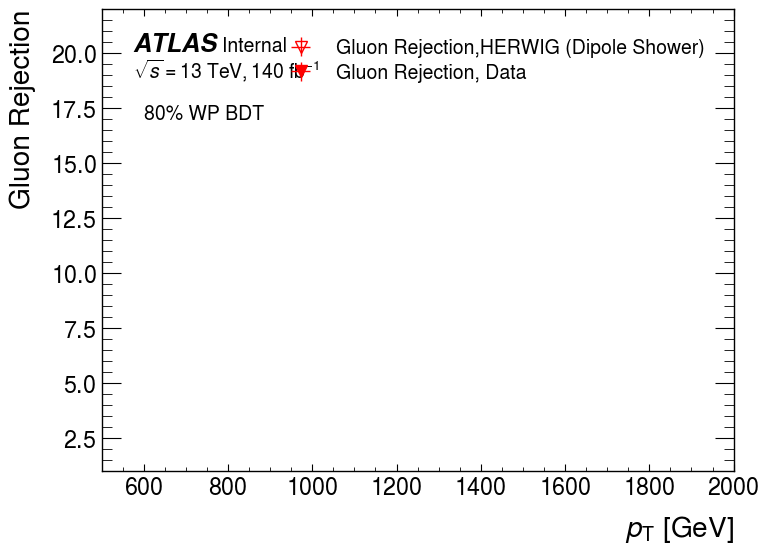

mc:  [0.8915124742776233+/-0.002220446779664965] data:  [0.9173077536189442+/-0.0008909047055237097]
mc:  [0.8915124742776233+/-0.002220446779664965, 0.8959137701414438+/-0.0012731519402764725] data:  [0.9173077536189442+/-0.0008909047055237097, 0.9016712673760102+/-0.001018357584703258]
mc:  [0.8915124742776233+/-0.002220446779664965, 0.8959137701414438+/-0.0012731519402764725, 0.9022486488728845+/-0.0018563743558602153] data:  [0.9173077536189442+/-0.0008909047055237097, 0.9016712673760102+/-0.001018357584703258, 0.8978092886217234+/-0.002536255084728043]
mc:  [0.8915124742776233+/-0.002220446779664965, 0.8959137701414438+/-0.0012731519402764725, 0.9022486488728845+/-0.0018563743558602153, 0.9056718809535695+/-0.004363857513948651] data:  [0.9173077536189442+/-0.0008909047055237097, 0.9016712673760102+/-0.001018357584703258, 0.8978092886217234+/-0.002536255084728043, 0.8876450611831619+/-0.006140587684520606]
mc:  [0.8915124742776233+/-0.002220446779664965, 0.8959137701414438+/-0.001

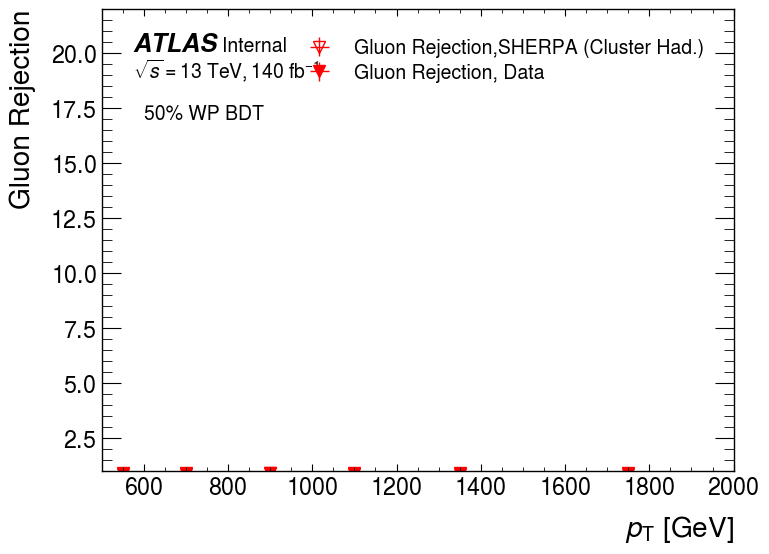

mc:  [0.830157178445678+/-0.002093743456931757] data:  [0.8619372963651986+/-0.0008423595085226804]
mc:  [0.830157178445678+/-0.002093743456931757, 0.8358652514553606+/-0.0011994039776627113] data:  [0.8619372963651986+/-0.0008423595085226804, 0.8443555968970885+/-0.0009590161593837931]
mc:  [0.830157178445678+/-0.002093743456931757, 0.8358652514553606+/-0.0011994039776627113, 0.8433712241117414+/-0.0017425212888475677] data:  [0.8619372963651986+/-0.0008423595085226804, 0.8443555968970885+/-0.0009590161593837931, 0.8418622261051253+/-0.002374213628265185]
mc:  [0.830157178445678+/-0.002093743456931757, 0.8358652514553606+/-0.0011994039776627113, 0.8433712241117414+/-0.0017425212888475677, 0.8447931709166683+/-0.004068158263890876] data:  [0.8619372963651986+/-0.0008423595085226804, 0.8443555968970885+/-0.0009590161593837931, 0.8418622261051253+/-0.002374213628265185, 0.8247701489472102+/-0.0057051195920715435]
mc:  [0.830157178445678+/-0.002093743456931757, 0.8358652514553606+/-0.0011

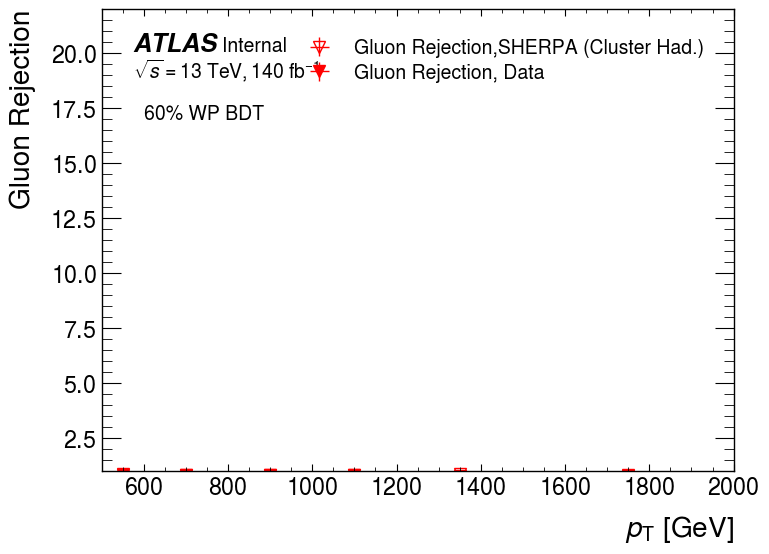

mc:  [0.7618466304908256+/-0.0019684081382576987] data:  [0.7956516491840024+/-0.0007931017015300334]
mc:  [0.7618466304908256+/-0.0019684081382576987, 0.7687289233441355+/-0.0011254766034226595] data:  [0.7956516491840024+/-0.0007931017015300334, 0.7778794446901525+/-0.0008995023133766404]
mc:  [0.7618466304908256+/-0.0019684081382576987, 0.7687289233441355+/-0.0011254766034226595, 0.77798410844525+/-0.0016332597375451955] data:  [0.7956516491840024+/-0.0007931017015300334, 0.7778794446901525+/-0.0008995023133766404, 0.7761595440126743+/-0.002216637526209243]
mc:  [0.7618466304908256+/-0.0019684081382576987, 0.7687289233441355+/-0.0011254766034226595, 0.77798410844525+/-0.0016332597375451955, 0.7578630170129634+/-0.0037167371855477355] data:  [0.7956516491840024+/-0.0007931017015300334, 0.7778794446901525+/-0.0008995023133766404, 0.7761595440126743+/-0.002216637526209243, 0.7391031273882653+/-0.005186455416836965]
mc:  [0.7618466304908256+/-0.0019684081382576987, 0.7687289233441355+/-

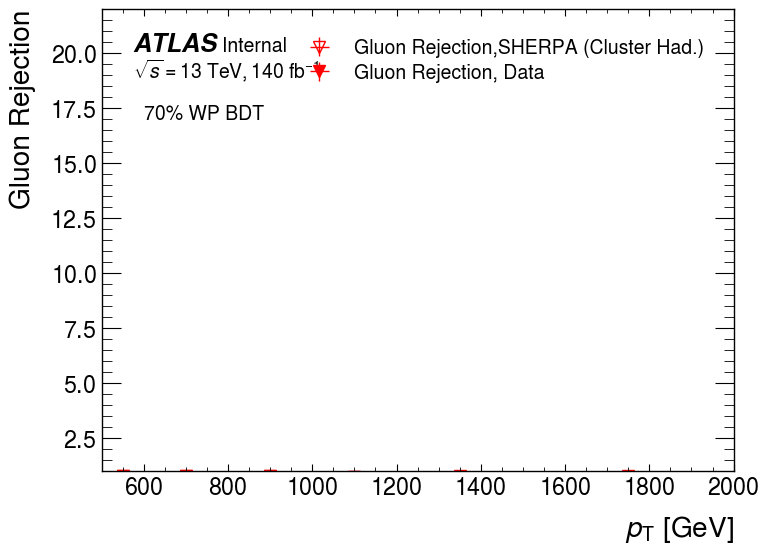

mc:  [0.654544478558918+/-0.0017802393324759644] data:  [0.6879881642970418+/-0.0007202215296942478]
mc:  [0.654544478558918+/-0.0017802393324759644, 0.632135881294336+/-0.000989283440209378] data:  [0.6879881642970418+/-0.0007202215296942478, 0.6419765397765912+/-0.0007901925731221504]
mc:  [0.654544478558918+/-0.0017802393324759644, 0.632135881294336+/-0.000989283440209378, 0.6408500524130637+/-0.0014290222356490724] data:  [0.6879881642970418+/-0.0007202215296942478, 0.6419765397765912+/-0.0007901925731221504, 0.6346602434790117+/-0.0019289363687924686]
mc:  [0.654544478558918+/-0.0017802393324759644, 0.632135881294336+/-0.000989283440209378, 0.6408500524130637+/-0.0014290222356490724, 0.6422625453340793+/-0.0033032496199181605] data:  [0.6879881642970418+/-0.0007202215296942478, 0.6419765397765912+/-0.0007901925731221504, 0.6346602434790117+/-0.0019289363687924686, 0.6181508180459291+/-0.004583559938787471]
mc:  [0.654544478558918+/-0.0017802393324759644, 0.632135881294336+/-0.0009

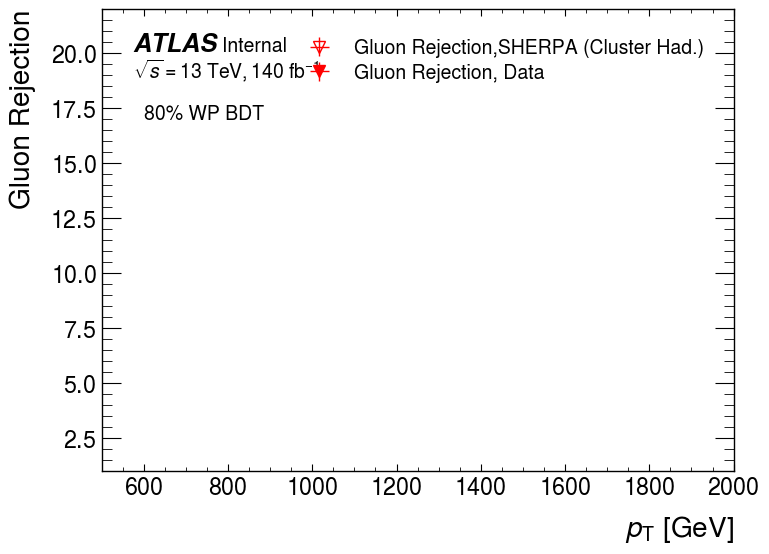

mc:  [0.9094520980003845+/-0.003526627767916812] data:  [0.9225046778477922+/-0.0009212919540745178]
mc:  [0.9094520980003845+/-0.003526627767916812, 0.9059633178244728+/-0.0018678580977563761] data:  [0.9225046778477922+/-0.0009212919540745178, 0.9048692064551589+/-0.0010333511451911072]
mc:  [0.9094520980003845+/-0.003526627767916812, 0.9059633178244728+/-0.0018678580977563761, 0.9113664110288983+/-0.0018651549487315163] data:  [0.9225046778477922+/-0.0009212919540745178, 0.9048692064551589+/-0.0010333511451911072, 0.9033022509224036+/-0.0025778397612306065]
mc:  [0.9094520980003845+/-0.003526627767916812, 0.9059633178244728+/-0.0018678580977563761, 0.9113664110288983+/-0.0018651549487315163, 0.9143950016943513+/-0.004378216445257184] data:  [0.9225046778477922+/-0.0009212919540745178, 0.9048692064551589+/-0.0010333511451911072, 0.9033022509224036+/-0.0025778397612306065, 0.8890393006061675+/-0.006290153542584275]
mc:  [0.9094520980003845+/-0.003526627767916812, 0.9059633178244728+/-

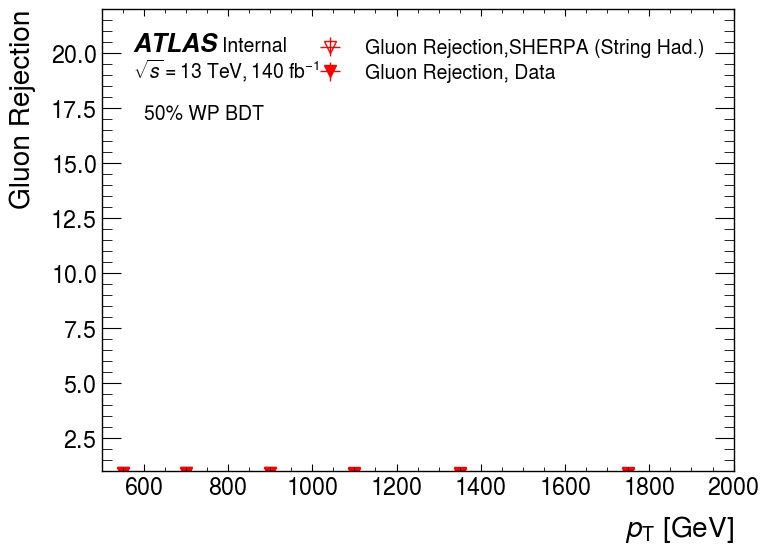

mc:  [0.8427331897249287+/-0.003299227344945846] data:  [0.8606003968081027+/-0.0008650881829255886]
mc:  [0.8427331897249287+/-0.003299227344945846, 0.8518794260216642+/-0.0017626833678834454] data:  [0.8606003968081027+/-0.0008650881829255886, 0.8529090887582013+/-0.0009771218303759259]
mc:  [0.8427331897249287+/-0.003299227344945846, 0.8518794260216642+/-0.0017626833678834454, 0.8574438566928091+/-0.0017555678053674303] data:  [0.8606003968081027+/-0.0008650881829255886, 0.8529090887582013+/-0.0009771218303759259, 0.8502510836702961+/-0.0024229865144748037]
mc:  [0.8427331897249287+/-0.003299227344945846, 0.8518794260216642+/-0.0017626833678834454, 0.8574438566928091+/-0.0017555678053674303, 0.863741723268388+/-0.004108616466825977] data:  [0.8606003968081027+/-0.0008650881829255886, 0.8529090887582013+/-0.0009771218303759259, 0.8502510836702961+/-0.0024229865144748037, 0.8377318492159487+/-0.005890169948882826]
mc:  [0.8427331897249287+/-0.003299227344945846, 0.8518794260216642+/-0

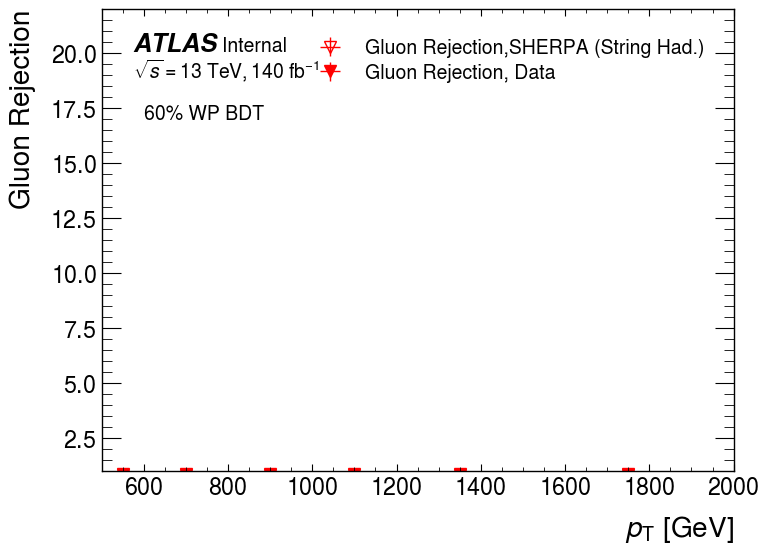

mc:  [0.7801466353872911+/-0.003114441816876366] data:  [0.8008232718170172+/-0.0008180620151404295]
mc:  [0.7801466353872911+/-0.003114441816876366, 0.7692933570357843+/-0.0016257482462063019] data:  [0.8008232718170172+/-0.0008180620151404295, 0.7727165939679794+/-0.0009013870549464669]
mc:  [0.7801466353872911+/-0.003114441816876366, 0.7692933570357843+/-0.0016257482462063019, 0.7752221115517895+/-0.0016144567762280287] data:  [0.8008232718170172+/-0.0008180620151404295, 0.7727165939679794+/-0.0009013870549464669, 0.76816025182108+/-0.0022189148180596016]
mc:  [0.7801466353872911+/-0.003114441816876366, 0.7692933570357843+/-0.0016257482462063019, 0.7752221115517895+/-0.0016144567762280287, 0.7844710034164651+/-0.0037675986849480484] data:  [0.8008232718170172+/-0.0008180620151404295, 0.7727165939679794+/-0.0009013870549464669, 0.76816025182108+/-0.0022189148180596016, 0.759004628386124+/-0.005381093926970709]
mc:  [0.7801466353872911+/-0.003114441816876366, 0.7692933570357843+/-0.00

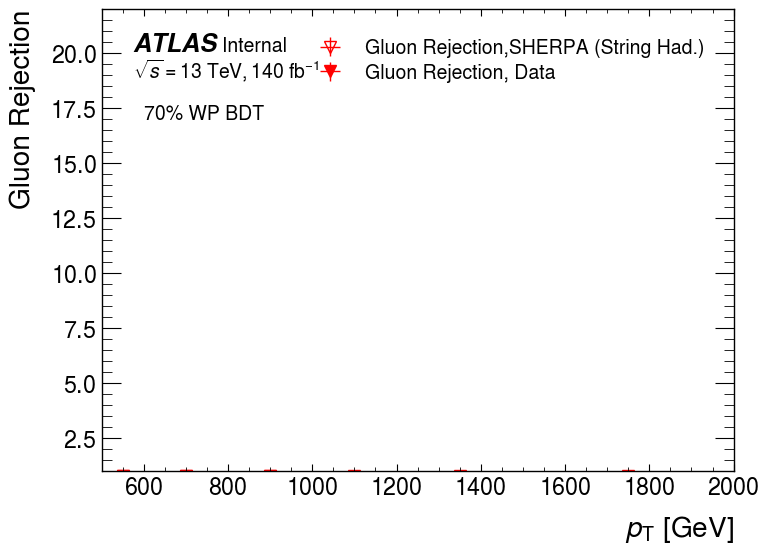

mc:  [0.6479389272421597+/-0.0027513852828671545] data:  [0.6692793889222037+/-0.0007251736643409742]
mc:  [0.6479389272421597+/-0.0027513852828671545, 0.6623956502353665+/-0.0014696818077179765] data:  [0.6692793889222037+/-0.0007251736643409742, 0.6649560002113711+/-0.0008139494033197001]
mc:  [0.6479389272421597+/-0.0027513852828671545, 0.6623956502353665+/-0.0014696818077179765, 0.6696200625368017+/-0.0014564604962035192] data:  [0.6692793889222037+/-0.0007251736643409742, 0.6649560002113711+/-0.0008139494033197001, 0.6616273576512247+/-0.001993754491734895]
mc:  [0.6479389272421597+/-0.0027513852828671545, 0.6623956502353665+/-0.0014696818077179765, 0.6696200625368017+/-0.0014564604962035192, 0.6829992742593008+/-0.003371408287185655] data:  [0.6692793889222037+/-0.0007251736643409742, 0.6649560002113711+/-0.0008139494033197001, 0.6616273576512247+/-0.001993754491734895, 0.6586767142770592+/-0.004811950270431235]
mc:  [0.6479389272421597+/-0.0027513852828671545, 0.6623956502353665

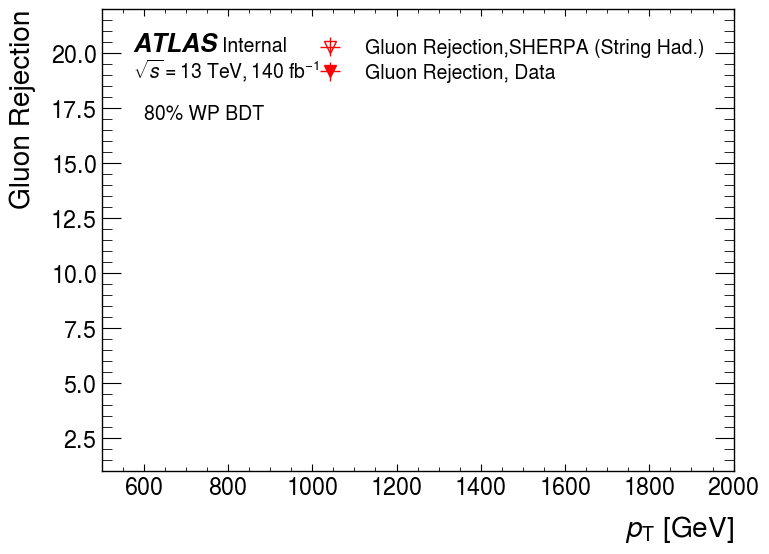

In [18]:
SFs = {}
Eff={}
Extraction_Results={}
syst_list=['nominal','matrix_element/powhegpythia','parton_shower/herwigangle','parton_shower/herwigdipole','hadronization/sherpa','hadronization/sherpalund']
#WP_cut_path = pkl_path/'nominal'/'plots'/'ADE'/'WP_cuts_pkls'/nominal_keys/'WP_cuts.pkl'
#WP_cut = joblib.load(WP_cut_path)
#WP_cut = dict.fromkeys(SF_label_vars)
for var in reweighting_vars:
    SFs[var] = {}
    Eff[var]={}
    WP_cut_path = pkl_path/'nominal'/'plots'/'ADE'/'WP_cuts_pkls'/ f'{var}_quark_reweighting_weights'/'WP_cuts.pkl'
    #WP_cut_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/plots/ADE/WP_cuts_pkls/jet_nTracks_quark_reweighting_weights/WP_cuts.pkl'
    WP_cut = joblib.load(WP_cut_path)
    #WP_cut = dict.fromkeys(var)
    #WP_cut[var] = dict.fromkeys(WPs)
    for syst in syst_list:
        SFs[var][syst]={}
        Eff[var][syst]={} 
        syst_path= pkl_path / syst / 'plots' / 'ADE' / 'Extraction_Results'

        Extraction_Results[syst]= joblib.load(syst_path / f'{var}_Extraction_Results.pkl' )
        output_path = f'../eff_gen/{syst}'

        for l_pt in label_ptrange[:-1]:
            Extraction_var_pt =  Extraction_Results[syst][var][l_pt]


        for WP in WPs:
            #WP_cut[var][WP] = dict.fromkeys(label_ptrange[:-1])
            SFs[var][syst][WP] = {}
            Eff[var][syst][WP] = {}

            quark_effs_at_pt = []
            gluon_rejs_at_pt = []
            quark_effs_data_at_pt = []
            gluon_rejs_data_at_pt = []
            for ii, l_pt in enumerate(label_ptrange[:-1]):
                extract_p_Quark_MC =  Extraction_Results[syst][var][l_pt]['extract_p_Quark_MC']
                extract_p_Gluon_MC =  Extraction_Results[syst][var][l_pt]['extract_p_Gluon_MC']
                extract_p_Quark_Data =  Extraction_Results[syst][var][l_pt]['extract_p_Quark_Data']
                extract_p_Gluon_Data =  Extraction_Results[syst][var][l_pt]['extract_p_Gluon_Data']

                extract_p_Quark_cum_sum = np.cumsum(unumpy.nominal_values(extract_p_Quark_MC))
                cut = np.where(extract_p_Quark_cum_sum >= WP)[0][0]+1
                #cut = WP_cut[var][WP][l_pt]['idx']
                

                quark_effs_at_pt.append(np.sum(extract_p_Quark_MC[:cut])) 
                #gluon_rejs_at_pt.append(1.0/np.sum(extract_p_Gluon_MC[:cut]))
                gluon_rejs_at_pt.append(np.sum(extract_p_Gluon_MC[cut:]))

                #gluon_rejs_at_pt.append(1.0 - (np.sum(extract_p_Quark_MC[:cut]))) 
                quark_effs_data_at_pt.append(np.sum(extract_p_Quark_Data[:cut]))
                #gluon_rejs_data_at_pt.append(1.0/np.sum(extract_p_Gluon_Data[:cut]))
                gluon_rejs_data_at_pt.append(np.sum(extract_p_Gluon_Data[cut:]))
                print('mc: ',gluon_rejs_at_pt,'data: ',gluon_rejs_data_at_pt)


            SF_quark, SF_gluon = Plot_WP(WP = WP, var= var, output_path= output_path, 
                    period= 'ADE', reweighting_var = var,
                    quark_effs= quark_effs_at_pt, gluon_rejs = gluon_rejs_at_pt,
                    quark_effs_data=quark_effs_data_at_pt, gluon_rejs_data = gluon_rejs_data_at_pt,syst=syst)
            
            SFs[var][syst][WP]["Quark"] = SF_quark
            SFs[var][syst][WP]["Gluon"] = SF_gluon
            Eff[var][syst][WP]["Quark"] = quark_effs_at_pt
            Eff[var][syst][WP]["Gluon"] = gluon_rejs_at_pt 
            Eff[var][syst][WP]["Quark_data"] = quark_effs_data_at_pt 
            Eff[var][syst][WP]["Gluon_data"] = gluon_rejs_data_at_pt 


In [23]:
Eff['jet_nTracks']['nominal'][0.5].keys()

dict_keys(['Quark', 'Gluon', 'Quark_data', 'Gluon_data'])

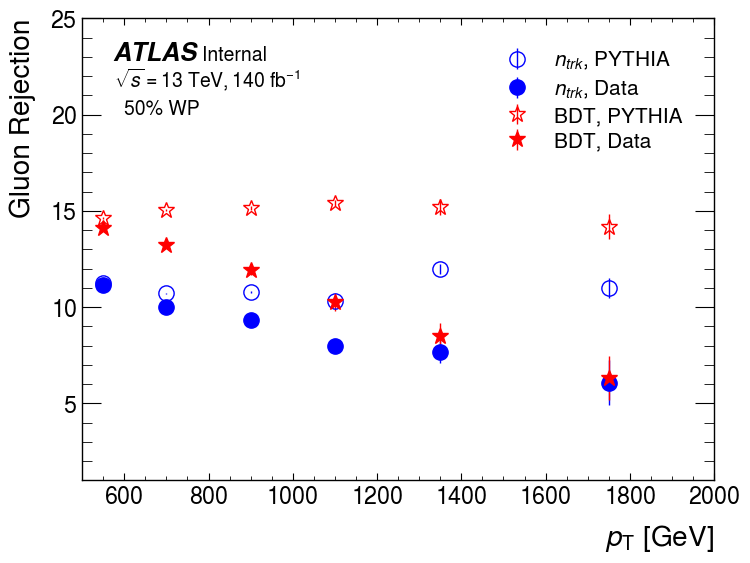

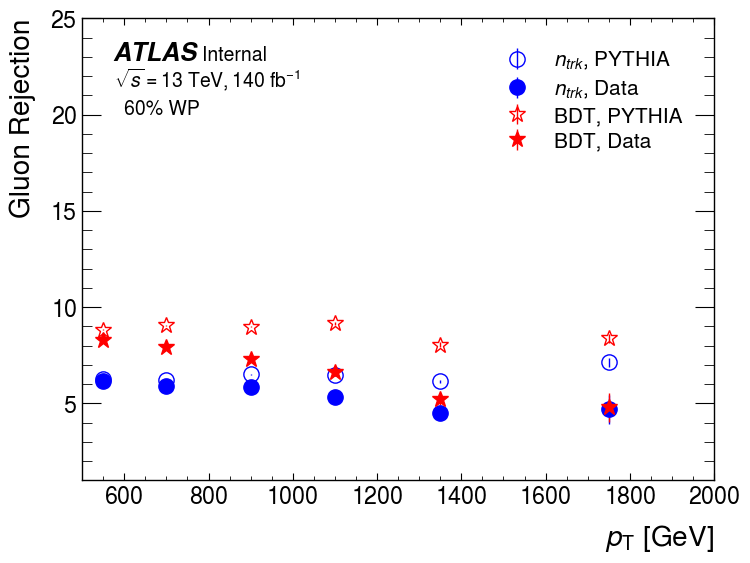

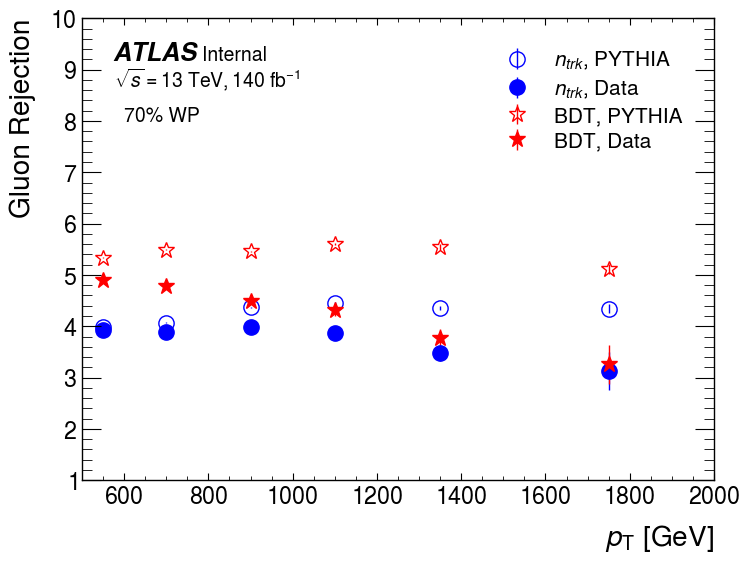

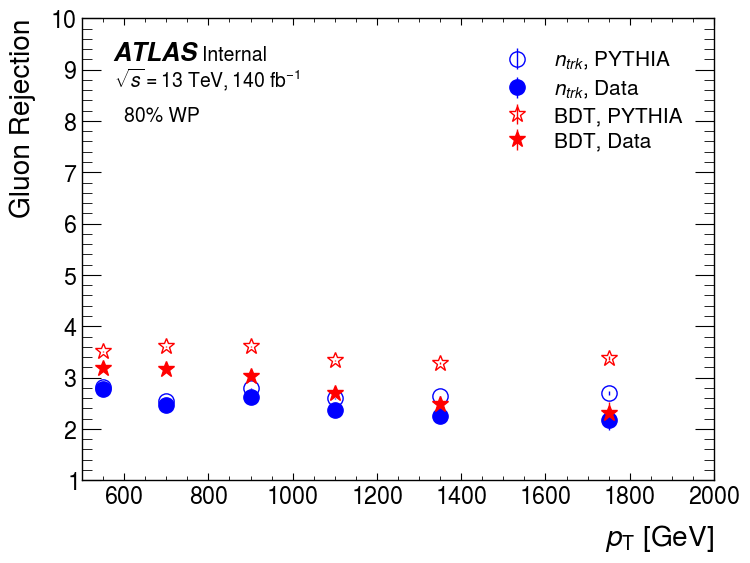

In [9]:
for WP in WPs:
    WP1=int(WP*100)
    fig, ax = plt.subplots()
    quark_nominal_values= unumpy.nominal_values(Eff['jet_nTracks']['nominal'][WP]['Gluon'])
    q_dev=unumpy.std_devs(Eff['jet_nTracks']['nominal'][WP]['Gluon'])       
    quark_nominal_values_d= unumpy.nominal_values(Eff['jet_nTracks']['nominal'][WP]['Gluon_data'])
    q_dev_d=unumpy.std_devs(Eff['jet_nTracks']['nominal'][WP]['Gluon_data'])       

    quark_nominal_values_bdt= unumpy.nominal_values(Eff['GBDT_newScore']['nominal'][WP]['Gluon'])
    q_dev_bdt=unumpy.std_devs(Eff['GBDT_newScore']['nominal'][WP]['Gluon'])       
    quark_nominal_values_d_bdt= unumpy.nominal_values(Eff['GBDT_newScore']['nominal'][WP]['Gluon_data'])
    q_dev_d_bdt=unumpy.std_devs(Eff['GBDT_newScore']['nominal'][WP]['Gluon_data'])     

    hep.histplot(quark_nominal_values,bins=label_ptrange,label=r'$n_{trk}$, PYTHIA',ax=ax,histtype='errorbar',yerr = q_dev,marker='o',mfc = 'none',color = "blue",markersize=11)
    hep.histplot(quark_nominal_values_d,bins=label_ptrange,label=r'$n_{trk}$, Data',ax=ax,histtype='errorbar',yerr = q_dev_d,marker='o',color = "blue",markersize=11)
    hep.histplot(quark_nominal_values_bdt,bins=label_ptrange,label='BDT, PYTHIA',ax=ax,histtype='errorbar',yerr = q_dev_bdt,marker='*',mfc = 'none',color = "red",markersize=12)
    hep.histplot(quark_nominal_values_d_bdt,bins=label_ptrange,label='BDT, Data',ax=ax,histtype='errorbar',yerr = q_dev_d_bdt,marker='*',color = "red",markersize=12)
    ax.set_xlim(label_ptrange[0], label_ptrange[-1])

    ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')
    ax.set_ylabel('Gluon Rejection')        
    ax.legend(fontsize=15,loc='upper right')

    if WP1>60:
        ax.set_ylim(1, 10)    
        ax.text(label_ptrange[1],8,f'{WP1}% WP')
    else:
        ax.set_ylim(1, 25)    
        ax.text(label_ptrange[1],20,f'{WP1}% WP')


    hep.atlas.label(label='Internal',ax=ax,lumi=140,data=True)

    fig.savefig(f"../eff_gen/WP{WP}_rej.pdf")

In [19]:
import pandas as pd
jet_pt=['500-600', '600-800', '800-1000','1000-1200','1200-1500','1500-2000']


Eff_syst={}


for var in reweighting_vars:
    Eff_syst[var]={}
    for WP in WPs:
        Eff_syst[var][WP]={}
        for j in partons:
            Eff_syst[var][WP][j]={}
            for syst in Eff['jet_nTracks'].keys():
                Eff_syst[var][WP][j][f'{Map_gen[syst]}']= safe_array_divide_unumpy(Eff[var]['nominal'][WP][j], Eff[var][syst][WP][j])
                #Eff_syst[var][WP][j][f'{Map_gen[syst]}']= unumpy.nominal_values(safe_array_divide_unumpy(Eff[var]['nominal'][WP][j], Eff[var][syst][WP][j]))

            #df = pd.DataFrame.from_dict(Eff_syst[var][WP][j], orient="index",columns=jet_pt)
            #df[1:].to_latex(f'../tables/SF_MC_{var}_{WP}_{j}.tex',caption=f'Scale Factors of {j} for {var} at {WP} \% WP',label=f'tab:SF_MC_{var}_{WP}_{j}',float_format="%.2f",column_format='ccccccc')


In [16]:
Eff_syst['jet_nTracks'][0.5]['Gluon']['POWHEG + PYTHIA']

array([0.9316885722411914+/-0.0053349763019829655,
       0.6779787120264091+/-0.004055303701908373,
       0.6987250496841074+/-0.006765643581002075,
       0.733400973461083+/-0.010988836335504439,
       0.6955069805861995+/-0.034232233839354254,
       0.7309062650529902+/-0.04123428408977687], dtype=object)

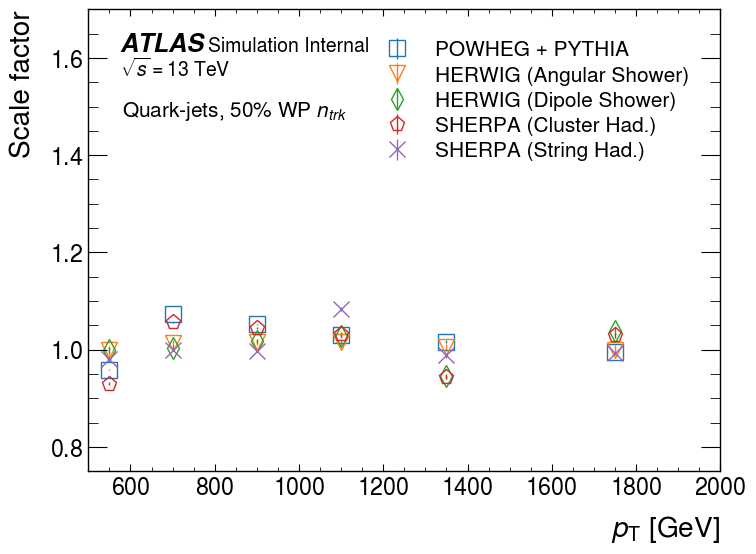

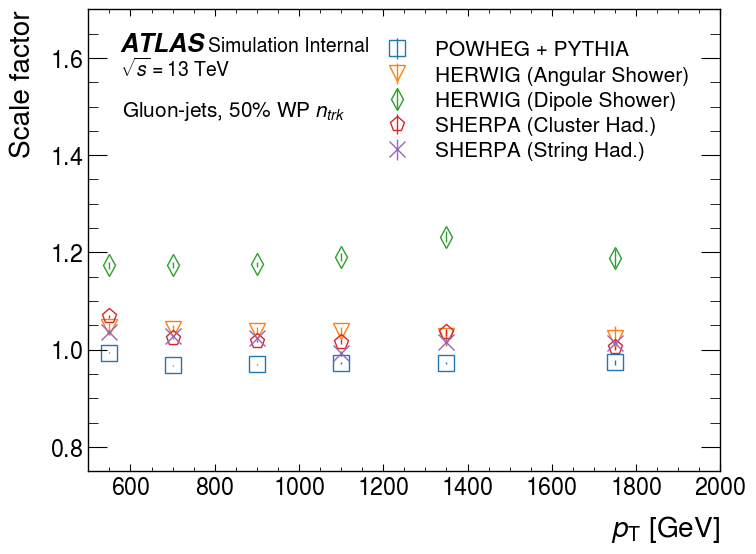

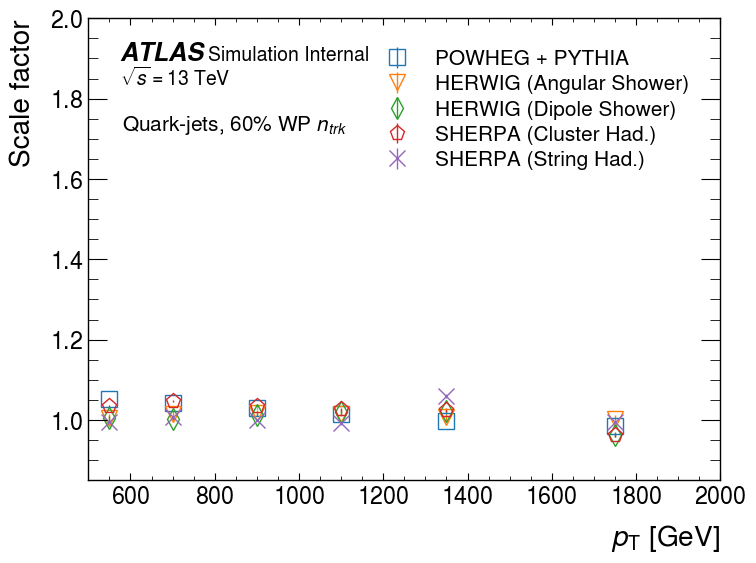

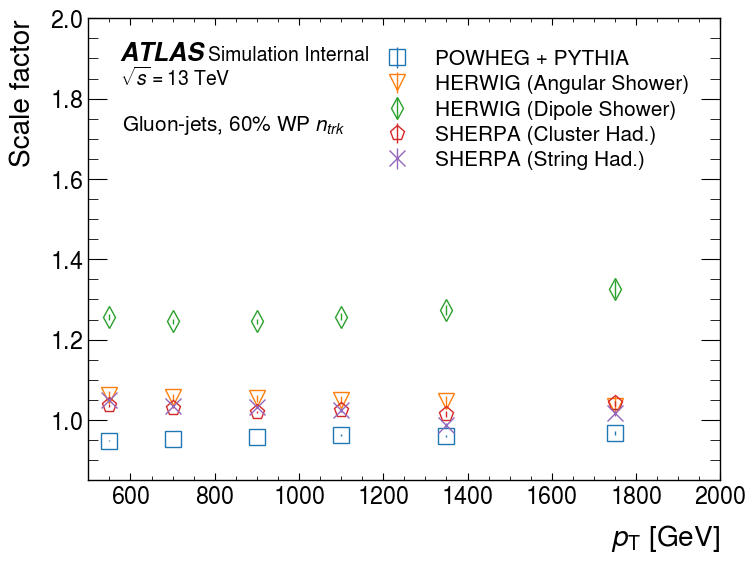

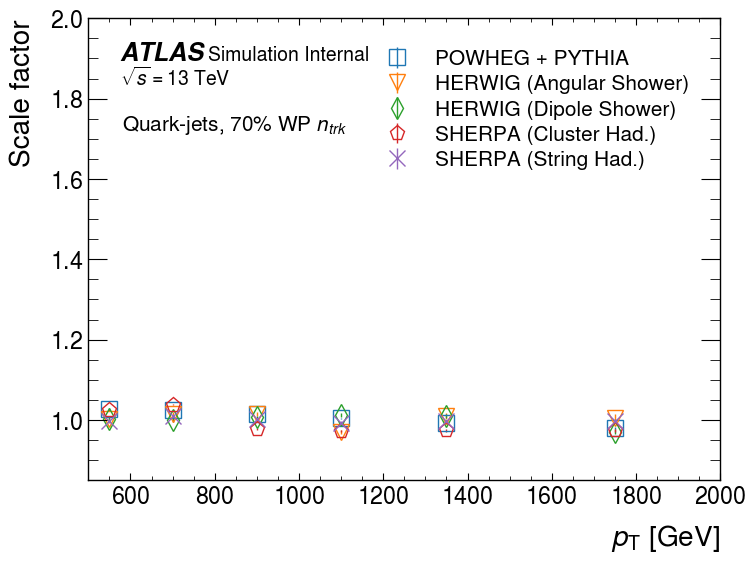

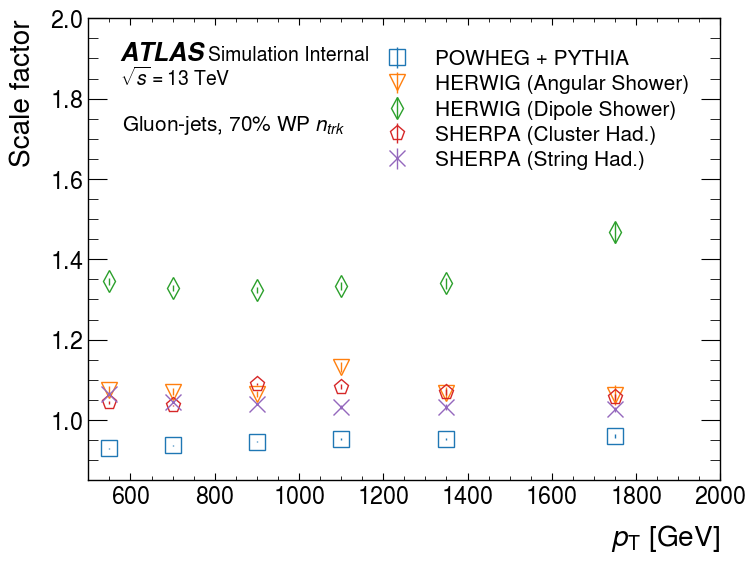

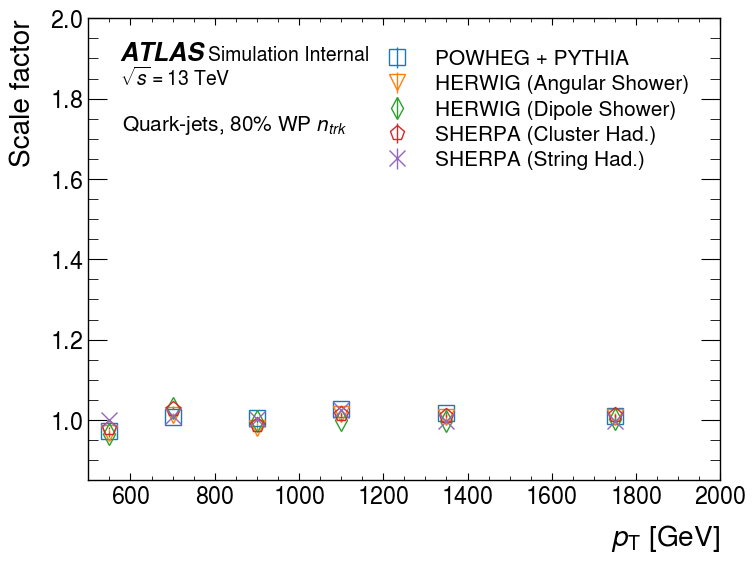

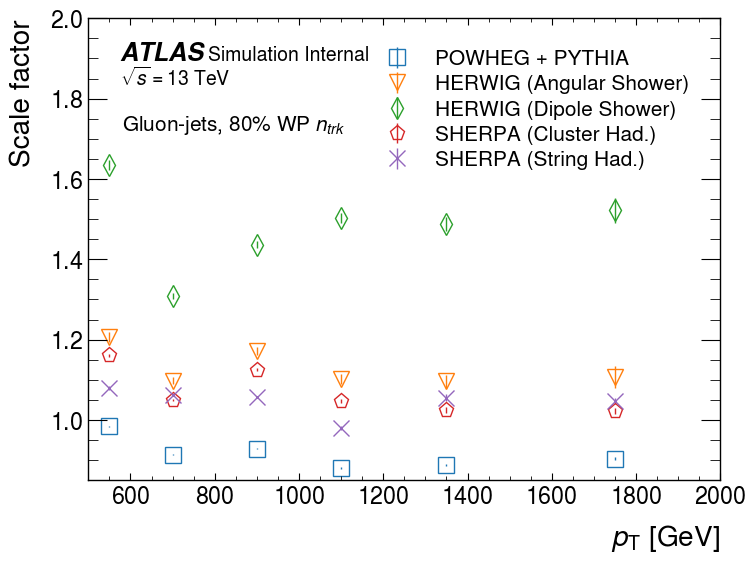

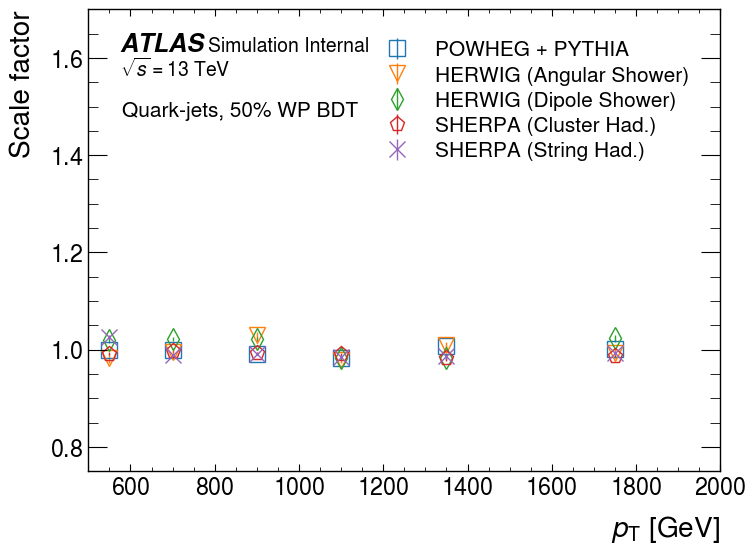

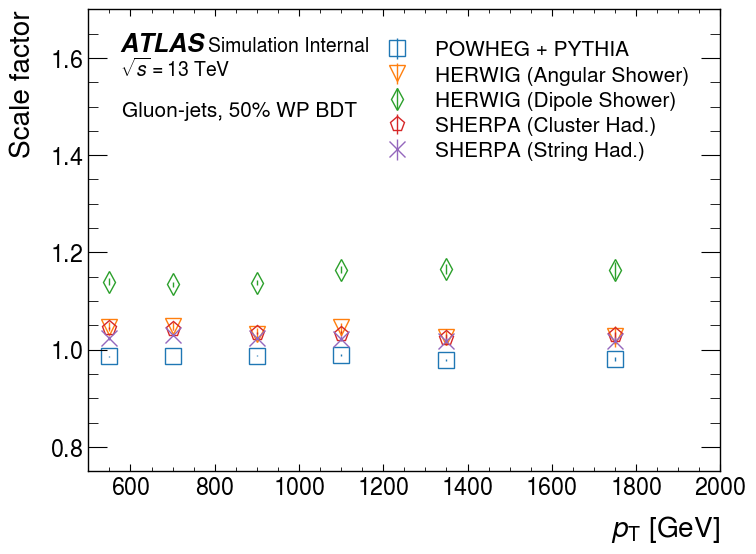

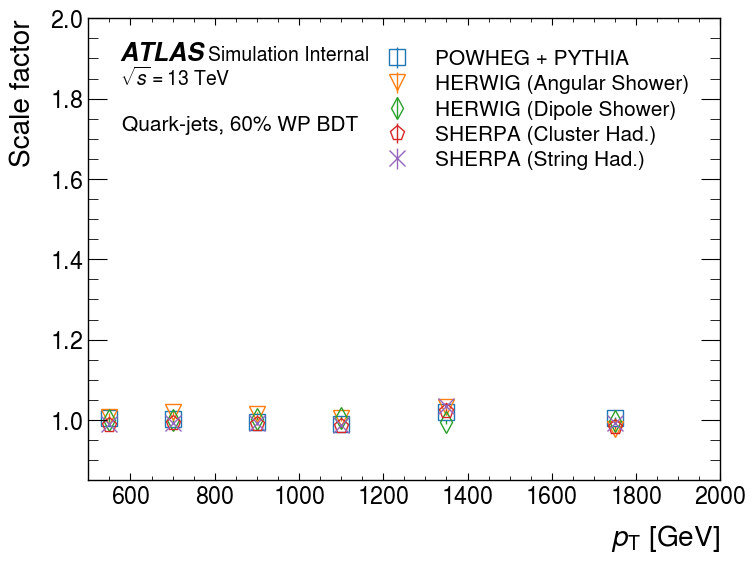

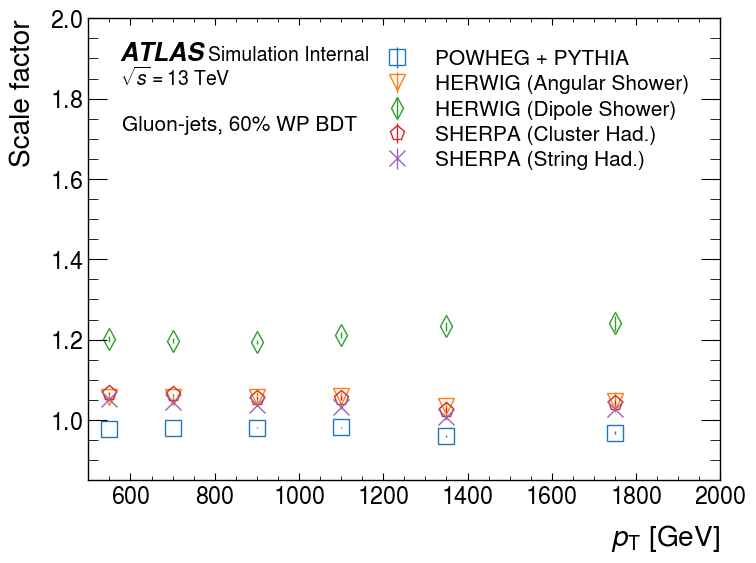

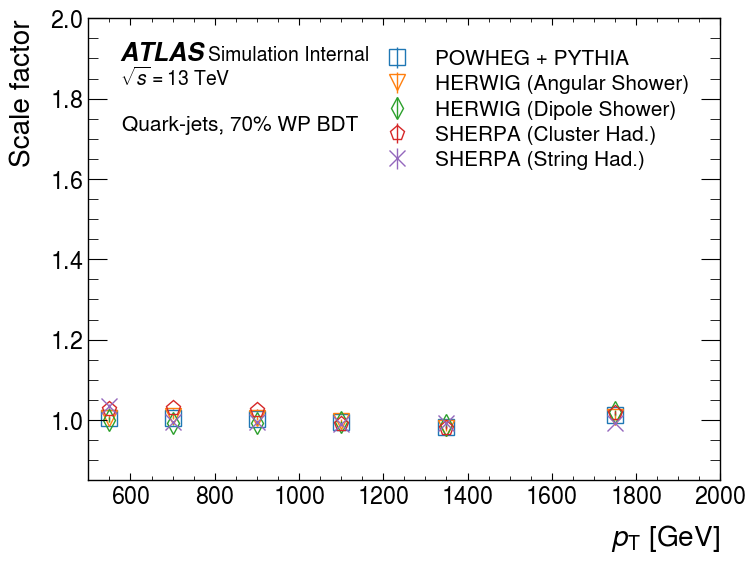

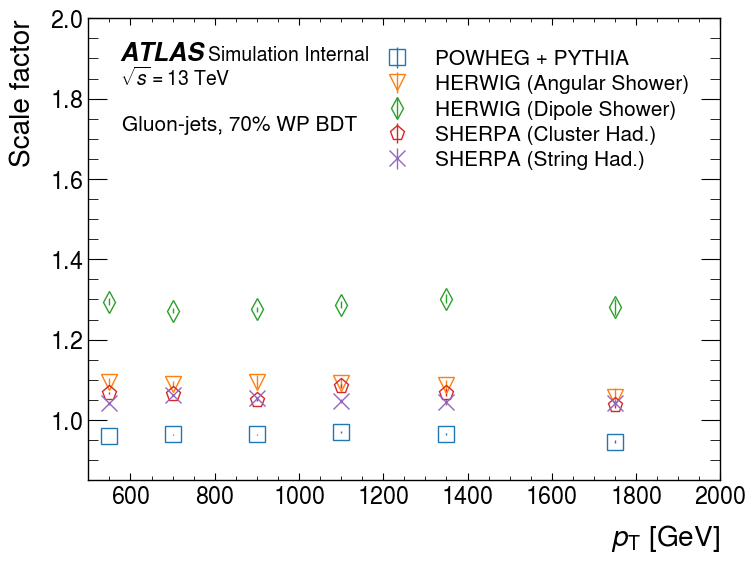

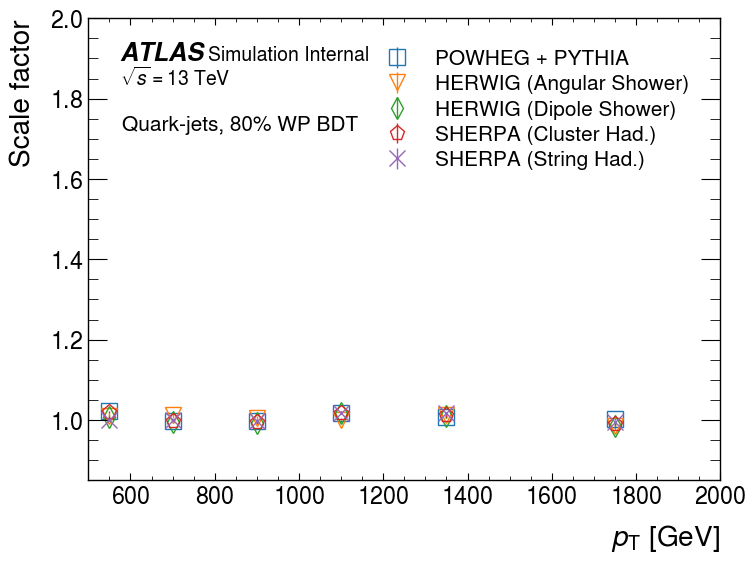

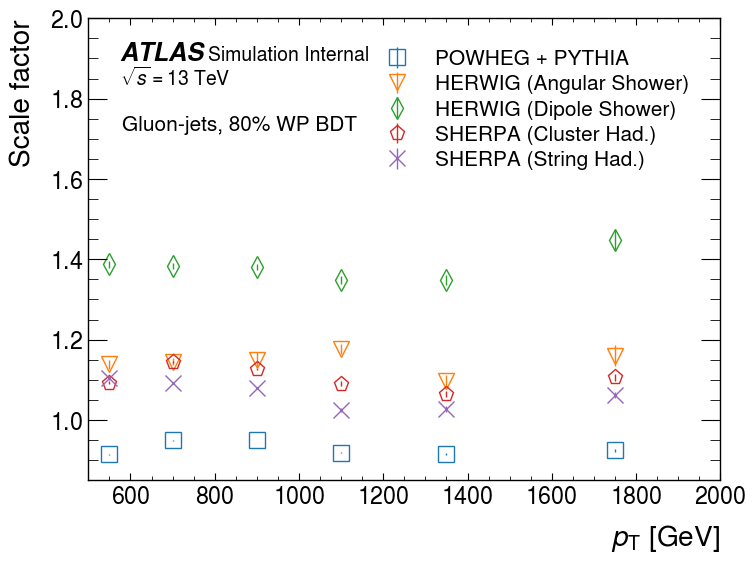

In [20]:
ind = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
ind_all = ind(15)
bin_centers1 = [500,700,900,1100,1350,2000]
#label_pt_bin = label_eta_bin
bin_centers = 0.5 * (np.array(label_pt_bin[:-1]) + np.array(label_pt_bin[1:]))

linestyle_list=['-',':',"-.","--"]
color_list=['firebrick','forestgreen','darkorange','orchid']
lines=['o','s','v','d','p','x','*','^']


for i_var, reweighting_var in enumerate(reweighting_vars):    
    for WP in WPs:
        WP1=int(WP*100)
        for parton in ['Quark','Gluon']:
            fig, ax = plt.subplots()
            ee=0
            for syst in Eff_syst[reweighting_var][WP][parton].keys():
                quark_nominal_values = unumpy.nominal_values(Eff_syst[reweighting_var][WP][parton][syst])
                q_dev=unumpy.std_devs(Eff_syst[reweighting_var][WP][parton][syst])           
                if syst != 'PYTHIA':
                    hep.histplot(quark_nominal_values,bins=label_ptrange,label=f'{syst}',ax=ax,histtype='errorbar',yerr=q_dev,mfc='none',marker=lines[ee],markersize=11)
                ee+=1

            ax.set_xlim(label_pt_bin[0], label_pt_bin[-1])
            if WP1>50:
                ax.set_ylim(0.85, 2)
                ax.text(580,1.72,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1

            else:
                ax.set_ylim(0.75, 1.7)
                ax.text(580,1.48,f'{parton}-jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1
            ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')

            ax.set_ylabel('Scale factor')
            ax.legend(fontsize=15,loc='upper right')
            hep.atlas.label(label='Internal',ax=ax)

            fig.savefig(f"../eff_gen/{reweighting_var}_WP{WP}_{parton}_gen.pdf")
            #fig.savefig(f"../syst_uncertainties_note_flate_eta/{reweighting_var}_WP{WP}_{parton}_comp.pdf")


In [28]:

df.head()

500-600   600-800  800-1000  1000-1200  \
nominal                      1.000000  1.000000  1.000000   1.000000   
hadronization/sherpa         0.934114  1.060333  1.049236   1.036101   
hadronization/sherpalund     0.985758  1.003732  1.000756   1.088308   
matrix_element/powhegpythia  0.962698  1.076796  1.056865   1.035018   
parton_shower/herwigangle    1.002968  1.017459  1.020095   1.019295   

                             1200-1500  1500-2000  
nominal                       1.000000   1.000000  
hadronization/sherpa          0.950120   1.037539  
hadronization/sherpalund      0.994862   1.000366  
matrix_element/powhegpythia   1.023289   1.002227  
parton_shower/herwigangle     1.011170   1.007737

/tmp/ipykernel_3284/3710522159.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(f'../tables/SF_MC.tex',caption=f'Scale Factors of \ntrk at 0.5 \% WP',label=f'tab:SF_MC',float_format="%.2f",column_format='ccccccc')
